EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 2**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `Josseline Yariela Canales` `jycanalesb@estudiante.uc.cl`
  - `Gabriel Eduardo Oquelí` `geoquelir@estudiante.uc.cl`
- Usuario de GitHub (opcional):
  `jycanalesb` josselinecanales1502@hotmail.com
  `GabOqueli-16062022` gabriel.oqueli@unah.hn
 `Repositorio`: https://github.com/GabOqueli-16062022/Aplicaciones_Machine_Learning_economia.git



## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 30 de mayo a las 20:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    2    |
| Pregunta 1.2                   |    2    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    5    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    2    |
| Pregunta 1.8                   |    3    |
| Pregunta 1.9                   |    3    |
| Pregunta 1.10                   |    5    |
| Pregunta 1.11                   |    5    |
| Pregunta 1.12                   |    5    |
| Pregunta 1.13                   |    3    |
| Pregunta 1.14                   |    5    |
| Pregunta 2.0                   |    1    |
| Pregunta 2.1                   |    1    |
| Pregunta 2.2                   |    1    |
| Pregunta 2.3                   |    3    |
| Pregunta 2.4                   |    5    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    3    |
| Pregunta 2.7                   |    3    |
| Pregunta 2.8                   |    5    |
| Pregunta 2.9                   |    7    |
| Pregunta 2.10                   |    4    |
| Pregunta 2.11                   |    3    |
| Pregunta 2.12                   |    1    |
| Pregunta 2.13                   |    2    |
| Pregunta 2.14                   |    3    |
| Pregunta 2.15                   |    2    |
| Pregunta 2.16                   |    3    |

Total: 100 pts.


# 1. Clasificación

En esta pregunta trabajaremos con un _dataset_ que contiene información campañas de marketing de un banco portugués. La campaña se enfocó en llamadas telefónicas a distintos segmentos de clientes, de forma individualizada, con el objetivo incenitvar la toma depósitos por parte de los clientes.

El problema presentado en este ejecicio busca predecir si el cliente suscribirá (sí/no) un depósito a plazo.



A continuación, se despliega información oficial sobre el _dataset_:

| Variable Name | Role    | Type        | Description                                                                                                                               |
|---------------|---------|-------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| age           | Feature | Integer     |     years of age                                                                                                                                      |
| job           | Feature | Categorical | type of job |
| marital       | Feature | Categorical | marital status                          |
| education     | Feature | Categorical | Education level         |
| default       | Feature | Binary      | has credit in default?                                                                                                                    |
| balance       | Feature | Integer     | average yearly balance in euros                                                                                                                    |
| housing       | Feature | Binary      | has housing loan?                                                                                                                         |
| loan          | Feature | Binary      | has personal loan?                                                                                                                        |
| contact       | Feature | Categorical | contact communication type                                                                         |
| day_of_week   | Feature | Date        | last contact day of the month (numeric)                                                                                                              |
| month         | Feature | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                          |
| duration*      | Feature | Integer     | last contact duration, in seconds (numeric).  |
| campaign      | Feature | Integer     | number of contacts performed during this campaign and for this client                                      |
| pdays         | Feature | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |
| previous      | Feature | Integer     | number of contacts performed before this campaign and for this client                                                                       |
| poutcome      | Feature | Categorical | outcome of the previous marketing campaign                                                |
| y             | Target  | Binary      | has the client subscribed a term deposit?                                                                                                 |


*Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



En el sitio web [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing) podrá encontrar información oficial del _dataset_.

Use el código otorgado a continuación para importar los datos.


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets


## Exploratory Data Analysis (EDA)

### Pregunta 1.0

Concatene `X` e `y` en un dataframe consolidado.

Muestre las primeras cinco observaciones en el dataframe consolidado. Despliegue información sobre el tipo de variable de cada una de las columnas del dataframe y despliegue estadísticas descriptivas de las variables según su tipo.

In [ ]:
#librerias varias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Concatenar X e y en un solo DataFrame
df = pd.concat([X, y], axis=1)

# Primeras cinco observaciones
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no  


In [ ]:
# Tipos de variables

print("\nTipos de variables por columna:")
print(df.dtypes)

df.info() #Hay variables numericas y categoricas

# Estadísticas descriptivas para variables numéricas
print("\nEstadísticas descriptivas para variables numéricas:")
print(df.describe())

# Estadísticas para variables categóricas
print("\nResumen para variables categóricas:")
print(df.select_dtypes(include='object').describe())



Tipos de variables por columna:
age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  4

*Respuesta/Comentario*

### Análisis de la estructura y contenido del dataset

Una vez consolidado el dataset con las variables explicativas (`X`) y la variable objetivo (`y`), se procedió a revisar los tipos de variables y sus estadísticas descriptivas.

#### 1. Tipos de variables

El dataset contiene tanto variables **numéricas** como **categóricas**. En total, se identifican **7 variables numéricas** (`int64`) y **10 categóricas** (`object`).  



#### 2. Variables numéricas

Entre las variables numéricas, se destacan:

- `age`: presenta una media de **40,9 años**, con un amplio rango (**18 a 95**), lo cual sugiere dispersión de edad de los clientes.
- `balance`: muestra una gran desviación estándar y valores extremos (hasta **102.127** y mínimos negativos), lo que indica la presencia de **outliers significativos** que podrían afectar los modelos.
- `duration`: presenta valores máximos muy altos (**hasta 4.918 segundos**), lo cual podría sesgar la distribución (pero para este ejercicio no se usará)
- `pdays` y `previous`: en ambos casos, la mayoría de los valores indican que los clientes **no fueron contactados anteriormente**, lo cual puede limitar su poder predictivo.


#### 3. Variables categóricas

Las variables categóricas presentan una distribución heterogénea:

- `job` y `education` tienen múltiples categorías, siendo `"blue-collar"` y `"secondary"` las más frecuentes.
- `housing`, `loan` y `default` son binarias, con predominancia de respuestas `"no"`, lo que podría reducir su variabilidad.
- `contact` y `poutcome` presentan valores ausentes o concentrados en pocas categorías.

En cuanto a la variable objetivo `y`, se observa un **fuerte desbalance de clases**, con una gran mayoría de casos `"no"` (clientes que no contrataron el depósito). Esto es importante, ya que podría afectar el desempeño de los modelos de clasificación, requiriendo el uso de técnicas como:
- Rebalanceo (oversampling/undersampling),
- Uso de métricas alternativas a la exactitud (precision, recall, F1).



### Pregunta 1.1

Identifique las columnas que presentan _missing values_ e indique el número de _missing values_ que poseen.

Impute los valores nulos con el método que estime conveniente, justificando su decisión.

In [ ]:
# Ver cantidad de valores nulos por columna
missing_counts = df.isnull().sum()
print("Valores nulos por columna:\n")
print(missing_counts[missing_counts > 0])

# Imputación con la moda (valor más frecuente)
df['contact'] = df['contact'].fillna(df['contact'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['job'] = df['job'].fillna(df['job'].mode()[0])


#se mantiene la variable y se rellena con 'unknown'
df['poutcome'] = df['poutcome'].fillna('unknown')

# Primeras cinco observaciones
print(df.head())



Valores nulos por columna:

job            288
education     1857
contact      13020
poutcome     36959
dtype: int64
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33   blue-collar   single  secondary      no        1      no   no   

    contact  day_of_week month  duration  campaign  pdays  previous poutcome  \
0  cellular            5   may       261         1     -1         0  unknown   
1  cellular            5   may       151         1     -1         0  unknown   
2  cellular            5   may        76         1     -1         0  unknown   
3  cellular            5   may        92         1     -1         0  unknown   
4  cellular            5   may       1




---


*Respuesta*

Siguiendo las recomendaciones de ayudantias anteriores y usando criterio propio para la imputacion de los missing, se encuentra que hay cuatro variables de tipo "object" o categóricas que tienen missing `job` (0.64%), `education` (4.1%), `contact` (28.8%) y poutcome tiene un altísimo porcentaje de valores nulos 81.8% respecto del total.

Para las primeras tres variables se optó por imputar con la **moda** (el valor más frecuente en cada columna).Dado que estas variables son categóricas y presentan una cantidad de datos faltantes moderada,

Esta decisión se justifica por las siguientes razones:

- La cantidad de valores faltantes es relativamente baja en comparación con el total de observaciones.
- Reemplazar los valores nulos con la moda permite mantener la estructura categórica original sin introducir nuevas categorías artificiales.
- En contextos donde los datos faltan de forma aleatoria o no se tiene certeza de por qué faltan, la imputación con la moda es una estrategia simple y efectiva que reduce el sesgo.

En el caso de la variable `poutcome`, inicialmente se consideró eliminar la columna debido al alto porcentaje de valores faltantes (alrededor del 82%). Sin embargo, se optó por conservarla e imputar los valores nulos con la categoría `'unknown'`.

Mantener esta variable permite al modelo capturar posibles patrones entre clientes que sí y no participaron en campañas anteriores. Además, imputar con `'unknown'` evita eliminar una cantidad significativa de observaciones y permite tratar los datos faltantes como una categoría válida durante el proceso de modelado.

---


---

### Pregunta 1.2


Genere histogramas de las variables categóricas desagregando por la variable objetivo de interés. Interprete las relaciones que observa.

Responda: ¿Cuáles creen que son las variables categóricas más relevantes a la hora de determinar si el individuo hará un depósito?

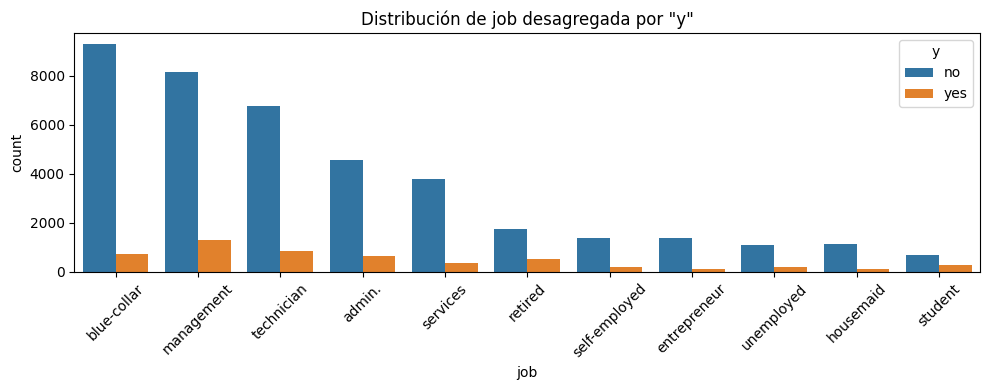

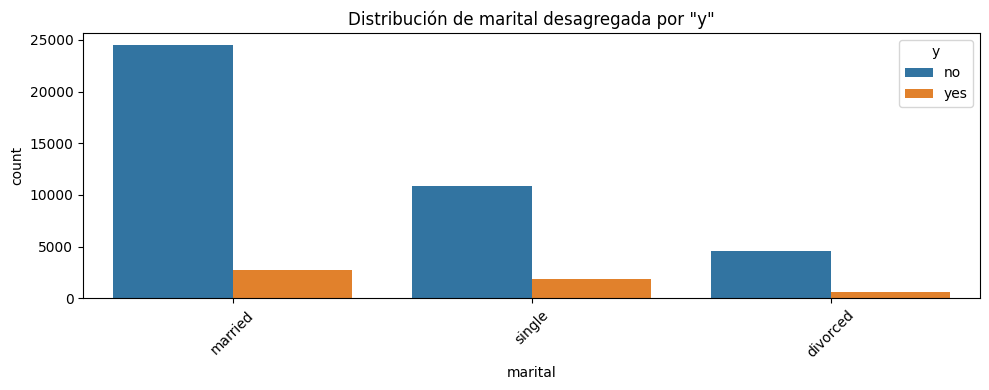

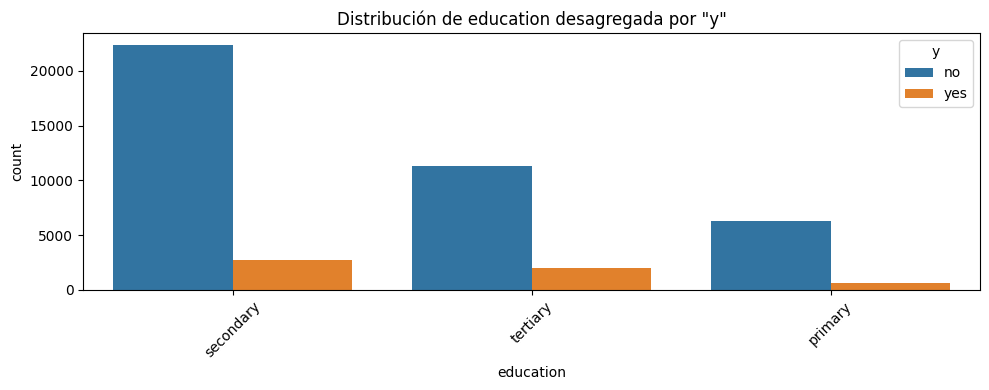

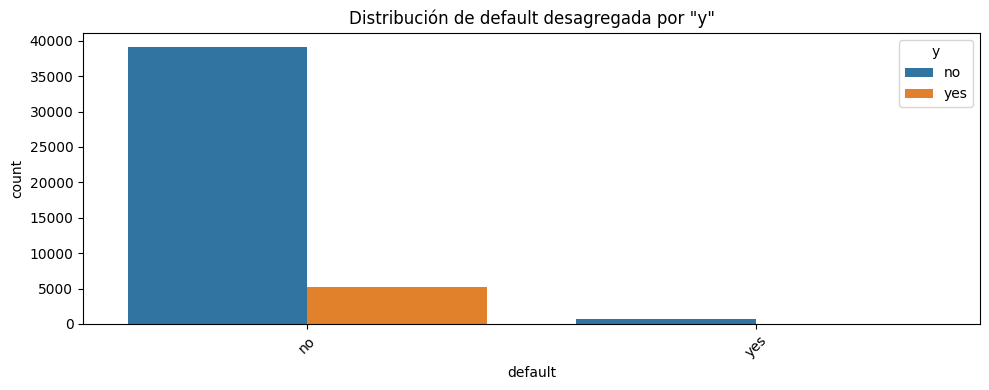

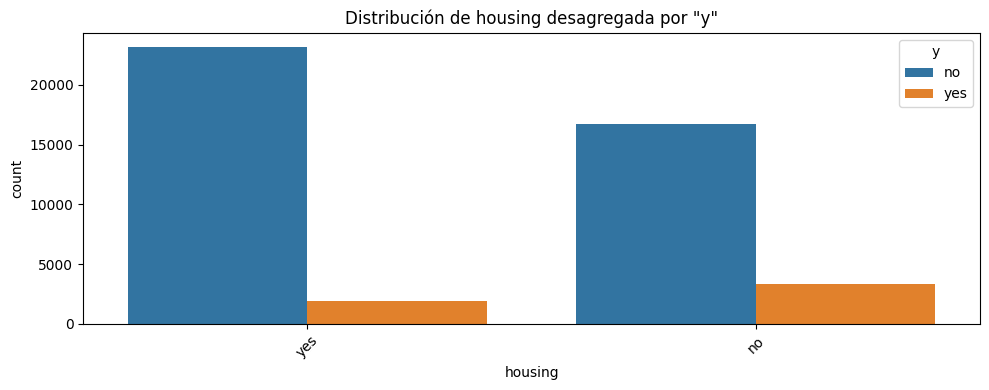

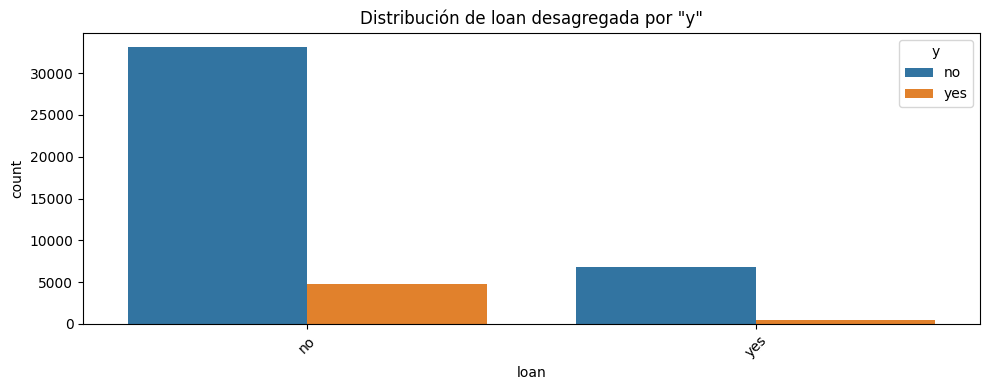

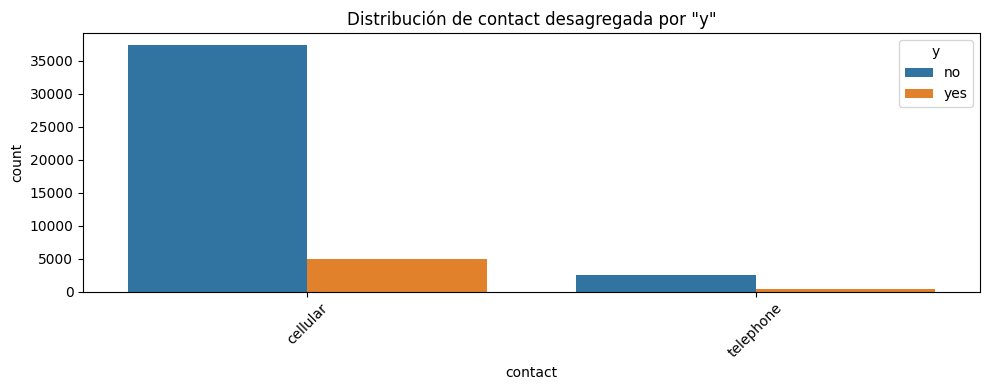

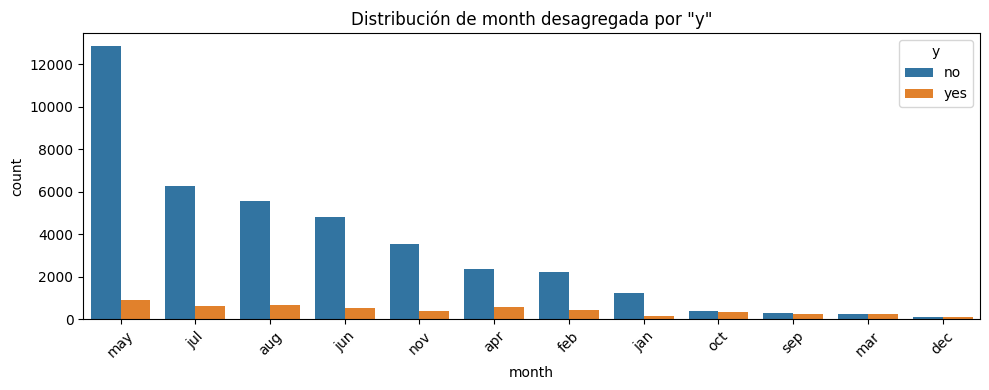

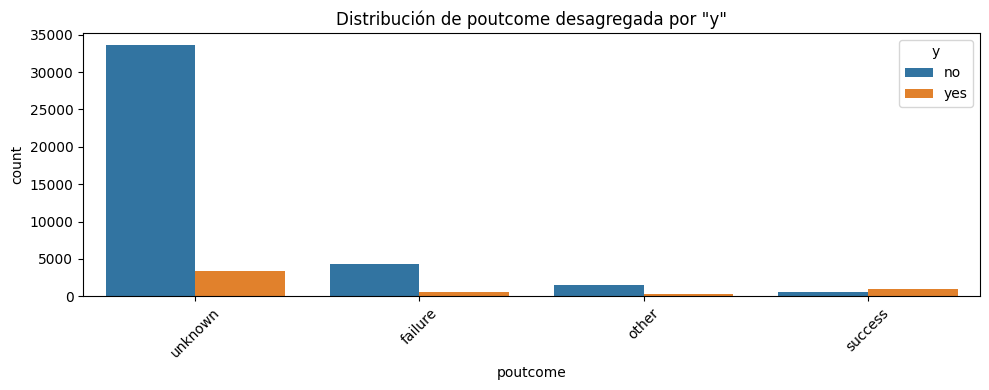

In [ ]:

# Lista de variables categóricas
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Crear gráficos
for var in cat_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=var, hue='y', order=df[var].value_counts().index)
    plt.title(f'Distribución de {var} desagregada por "y"')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()





---

*Respuesta* El análisis exploratorio de las variables categóricas revela patrones relevantes sobre los perfiles de clientes que tienden a suscribir un depósito a plazo.

En primer lugar, se observa que, aunque la mayoría de los clientes pertenece a sectores como blue-collar y management, las tasas más altas de suscripción (y = yes) se concentran en grupos como retired, student y unemployed, lo que sugiere que las personas con menos compromisos laborales podrían estar más dispuestas a ahorrar.

A nivel educacional, los clientes con estudios terciarios presentan mayor propensión a aceptar la oferta, posiblemente debido a mayor conciencia o estabilidad financiera. Además, los individuos solteros muestran mayor disposición a suscribir que los casados.

En relación con las variables asociadas al endeudamiento, se observa un patrón claro: los clientes con menor carga financiera son más propensos a suscribir un depósito a plazo. Por ejemplo, entre quienes se encuentran en situación de default, la tasa de respuesta afirmativa es muy baja, lo que resulta coherente con su mayor riesgo financiero y menor capacidad de ahorro. De forma similar, aquellos que no tienen créditos hipotecarios muestran una mayor proporción de respuestas positivas, lo que sugiere que la ausencia de compromisos financieros relevantes facilita la disposición a ahorrar. Este patrón se reafirma al analizar la variable loan, donde los clientes sin préstamos personales también presentan una mayor propensión a aceptar la oferta del banco.

En cuanto al tipo de contacto, las llamadas por celular son más frecuentes y efectivas en comparación con el teléfono fijo. Por otro lado, los resultados varían significativamente según el mes, destacando mayores tasas de conversión en marzo, diciembre y octubre, lo que podría estar vinculado a factores estacionales.

Finalmente, los clientes con historial positivo en campañas anteriores (poutcome = success) muestran una clara mayor propensión a aceptar nuevas ofertas, subrayando la importancia de la experiencia previa como predictor.

Estos hallazgos permitirán al modelo identificar patrones relevantes y mejorar la predicción del comportamiento de los clientes ante futuras campañas.


---

### Pregunta 1.3

Identifique _outliers_ entre las variables numéricas del dataset. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

In [ ]:
df['previous'].describe()
df['previous'].unique()


array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])


Tipos de variables por columna:
age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object
age: 487 outliers
balance: 4729 outliers
day_of_week: 0 outliers
duration: 3235 outliers
campaign: 3064 outliers
pdays: 8257 outliers
previous: 8257 outliers


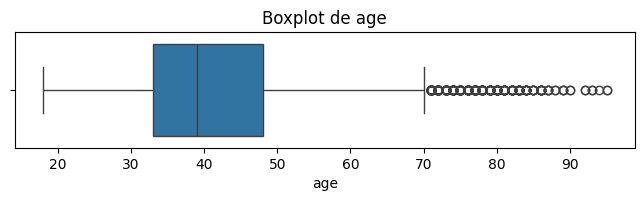

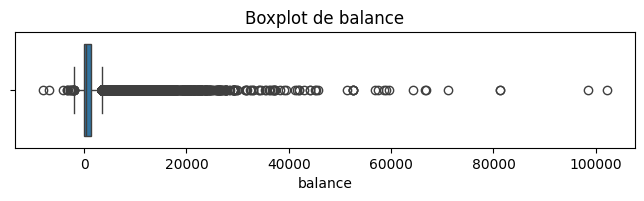

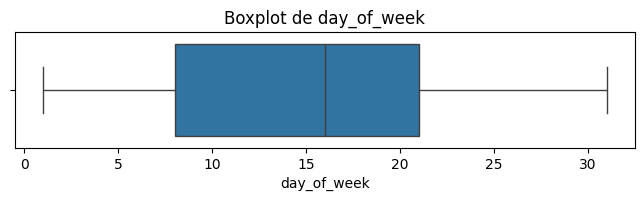

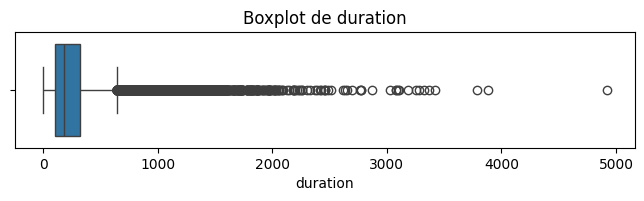

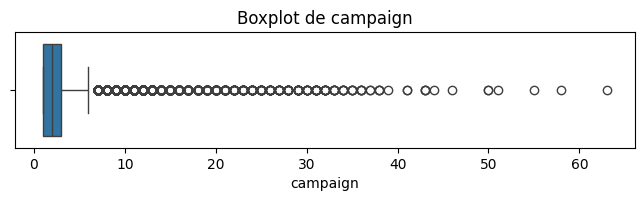

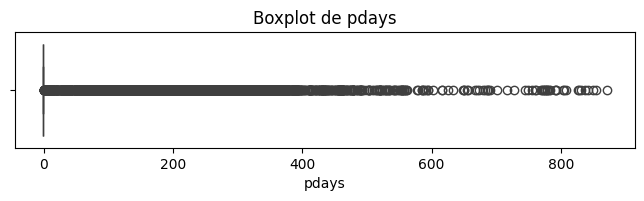

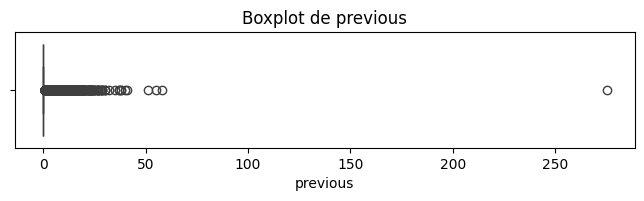

In [ ]:
#  Visualizamos estadísticas nuevamente y vemos los mínimos y máximos
df.describe()

print("\nTipos de variables por columna:")
print(df.dtypes)

# Detección de outliers con IQR
def detectar_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers

# Se aplica a cada variable numérica
for col in ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']:
    detectar_outliers_iqr(df, col)


for col in ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


## Imputaciónes por variable numéricas ##

#1. age: No se imputa
#2. balance: No se imputa reflejan heterogeneidad financiera.
#3. day_of_week: No tiene outliers

#4. duration se elimina porque no se usará en la predicción

df.drop(columns=['duration'], inplace=True)

#5. campaign se winsoriza a un máximo razonable de 15

df['campaign'] = df['campaign'].apply(lambda x: 15 if x > 15 else x)

#6. pdays indica Número de días que han pasado desde la última vez que el cliente fue contactado en una campaña anterior.

# Se crea variable binaria: fue o no contactado anteriormente

df['contactado_anteriormente'] = df['pdays'].apply(lambda x: 0 if x == -1 else 1)

# Eliminar la variable original para evitar confusión, se deja la variable binaria ('contactado_anteriormente')

df.drop(columns='pdays', inplace=True)


#7. previous indica el número de veces que el cliente fue contactado antes en campañas anteriores. se winsoriza a un máximo razonable de 10 ya que el 99.9% de los clientes tienen menos de 10 contactos
df['previous'].describe()

df['previous'] = df['previous'].apply(lambda x: 10 if x > 10 else x)





---


*Respuesta*

 “El análisis de valores atípicos en las variables numéricas permitió tomar decisiones informadas sobre su tratamiento.
 En el caso de `age`, los valores extremos (por ejemplo, mayores a 90 años) se consideran plausibles y no fueron modificados, ya que reflejan la diversidad etaria real de los clientes.
 La variable `balance` también presentó una alta cantidad de outliers tanto positivos como negativos, los cuales representan diferencias reales en la capacidad financiera de los individuos, por lo que se optó por conservarlos sin imputación.
 En contraste, `day_of_week` no presentó outliers, y se detectó que su tratamiento como variable numérica era inapropiado, por lo que fue reconvertida a categórica.
 En cuanto a `duration`, se decidió eliminarla del análisis predictivo, dado que su valor se conoce solo posterior a la llamada telefónica y, por lo tanto, no es útil para un modelo realista.
 Para `campaign`, se aplicó winsorización con un umbral máximo de 15 contactos, con el objetivo de reducir el ruido generado por valores atípicamente altos.

 Respecto a `pdays`, el valor -1 indica que el cliente no fue contactado anteriormente; se transformó esta variable en una nueva categórica binaria que distingue entre clientes previamente contactados y no contactados.

 Finalmente, `previous` representa la cantidad de veces que el cliente fue contactado en campañas anteriores. Su distribución está altamente sesgada a la derecha: más del 75% de los clientes nunca fue contactado antes (`previous = 0`), mientras que algunos casos excepcionales presentan valores extremadamente altos (hasta 275 contactos). Aunque no presenta valores nulos, se decidió aplicar una **winsorización** en el valor máximo, fijando un tope en `10 contactos`, con el fin de evitar que estos outliers distorsionen el aprendizaje del modelo. Esta transformación preserva la información útil de la variable sin comprometer su estabilidad estadística.


 Estas decisiones buscan preservar la integridad de los datos, minimizando el sesgo que los valores extremos podrían inducir en el modelo.”






---

In [ ]:
df.info() #Hay variables numericas y categoricas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       45211 non-null  int64 
 1   job                       45211 non-null  object
 2   marital                   45211 non-null  object
 3   education                 45211 non-null  object
 4   default                   45211 non-null  object
 5   balance                   45211 non-null  int64 
 6   housing                   45211 non-null  object
 7   loan                      45211 non-null  object
 8   contact                   45211 non-null  object
 9   day_of_week               45211 non-null  int64 
 10  month                     45211 non-null  object
 11  campaign                  45211 non-null  int64 
 12  previous                  45211 non-null  int64 
 13  poutcome                  45211 non-null  object
 14  y                     

## Feature Engineering

In [ ]:
#Binarias
print("default:", df['default'].unique())
print("housing:", df['housing'].unique())
print("loan:", df['loan'].unique())
print("contactado_anteriormente:", df['contactado_anteriormente'].unique())
#multinivel_dummies
print("job:", df['job'].unique())
print("contact:", df['contact'].unique())
print("marital:", df['marital'].unique())
print("poutcome:", df['poutcome'].unique())

#multinivel_ordenadas

print("month:", df['month'].unique())
print("education:", df['education'].unique())


default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contactado_anteriormente: [0 1]
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
contact: ['cellular' 'telephone']
marital: ['married' 'single' 'divorced']
poutcome: ['unknown' 'failure' 'other' 'success']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
education: ['tertiary' 'secondary' 'primary']


### Pregunta 1.4

 Cree un _pipeline_ de preprocesamiento con las siguientes transformaciones a las columnas correspondientes:

*   **Columnas Numéricas** : Aplique un `StandardScaler` para estandarizar estas variables.
*   **Columnas Categóricas Binarias** : Aplique `OneHotEncoder` para crear variables dummy. Asegúrese de manejar posibles categorías desconocidas durante la transformación.
*   **Columnas a Eliminar** : Elimine columnas que dejan de ser relavantes luego de las trasformaciones.
*  **Columnas Dummies MultiNivel** : cree columnas dummies para las variables multi categoricas (tomando codificadas a 0s y 1s =, para su respctiva categoria)
*  **Columnas Label Encoding MultiNivel** : Dentro de las columnas multinivel hay 2 columnas que presentan un orden natural. e.g. en la columna 'month' tenemos que 'jan' < 'feb' < 'dec'. Aplique en la columna 'month' y otra columna que deberá determinar usted un label encoder que capture ese ordenamiento natural, luego normalice con un minmax scaler para que las columnas varien entre 0 y 1.


Una vez creado el pipeline, aplíquelo a su conjunto de features (`X`). Muestre la forma (_shape_) del dataset original y del dataset procesado para verificar los cambios. ¿Cuántas nuevas columnas hay?

Adicionalmente, elimine del análisis la variable `day_of_week`. Si considera necesario realizar transformaciones adicionales a las variables, realicelas en este punto.



In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

# 1. Eliminar columna 'day_of_week', respecto a feature duration (se eliminó en el inciso anterior)
#df = df.drop(columns=['day_of_week'])

# 2. Separar X e y
X = df.drop(columns=['y'])
y = df['y'].map({'no': 0, 'yes': 1})  # binarizamos la variable target

# 3. Identificar columnas por tipo
num_cols = ['age', 'balance', 'campaign', 'previous']
bin_cols = ['default', 'housing', 'loan', 'contactado_anteriormente', 'contact']# binarias
multinivel_dummies = ['job', 'marital', 'poutcome']
multinivel_ordenadas = ['month', 'education']

# 4. Definir orden lógico para columnas con orden natural
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

education_order = ['primary', 'secondary', 'tertiary']


# 5. Transformadores
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))
])

multi_dummy_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[month_order, education_order])),
    ('scaler', MinMaxScaler())
])

# 6. ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('bin', binary_transformer, bin_cols),
        ('multi_dummy', multi_dummy_transformer, multinivel_dummies),
        ('ord', ordinal_transformer, multinivel_ordenadas)
    ],
    remainder='drop'
)

# 7. Aplicar transformador
X_processed = preprocessor.fit_transform(X)

# 8. Mostrar forma original y nueva
print("Forma original de X:", X.shape)
print("Forma después del preprocesamiento:", X_processed.shape)

# ¿Cuántas nuevas columnas creé 14?
print("Nuevas columnas creadas:", X_processed.shape[1] - X.shape[1])


Forma original de X: (45211, 15)
Forma después del preprocesamiento: (45211, 29)
Nuevas columnas creadas: 14


---


*Respuesta*

> Para preparar los datos antes de entrenar modelos de clasificación, se construyó un pipeline de preprocesamiento que transforma las variables según su naturaleza. En primer lugar, se separaron las variables predictoras (`X`) de la variable objetivo (`y`), la cual fue binarizada para representar el resultado de la campaña de marketing. Luego, se clasificaron las columnas en cuatro grupos: (i) variables numéricas (`age`, `balance`, `campaign`, `previous`), que fueron estandarizadas utilizando `StandardScaler`; (ii) variables categóricas binarias (`default`, `housing`, `loan`, `contactado_anteriormente`, `contact`), que se transformaron mediante `OneHotEncoder`, eliminando una categoría redundante en cada caso; (iii) variables categóricas multinivel sin orden natural (`job`, `marital`, `poutcome`), que también fueron transformadas mediante `OneHotEncoder`; y (iv) variables categóricas con orden natural (`month` y `education`), que fueron codificadas con `OrdinalEncoder` según un orden lógico predefinido y luego normalizadas a un rango entre 0 y 1 usando `MinMaxScaler`. Todas estas transformaciones fueron integradas en un `ColumnTransformer`, el cual fue ajustado al conjunto de entrenamiento.

> Finalmente, se aplicó este preprocesador a `X`, lo que resultó en un nuevo conjunto de datos transformado con mayor dimensión, reflejando las variables dummy y codificadas generadas. Este paso garantiza que los datos estén en un formato adecuado para alimentar modelos de Machine Learning, respetando la naturaleza de cada variable y evitando errores por codificación incorrecta.


----

## Modelos

En esta sección aplicaremos los algoritmos de clasificación vistos en el curso. Específicamente, compararemos el rendimiento de los siguientes modelos:

*   _Decision Tree Classifier_
*   _Random Forest Classifier_
*   _XGBoost Classifier_
*   _Naïve Bayes_



### Pregunta 1.5

Divida el conjunto de datos en conjuntos de entrenamiento y de prueba. Analice la distribución de la variable objetivo en ambos conjuntos para determinar si el conjunto de datos está balanceado o no.

En caso de que el conjunto de datos no esté balanceado, asegúrese de que la división de _train_-_test_ respete el balance de las clases target para evitar que se genere un sesgo. Para esto, se recomienda leer la documentación oficial de la función `train_test_split()`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

Use la semilla `random_state` = 123.


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# División en conjunto de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y,
    test_size=0.3,
    random_state=123,
    stratify=y
)


# Convertí a DataFrame temporal para visualizar proporciones
def analizar_balance(y_train, y_test):
    print("Distribución en Train:")
    print(y_train.value_counts(normalize=True).rename(lambda x: f"Clase {x}"))
    print("\nDistribución en Test:")
    print(y_test.value_counts(normalize=True).rename(lambda x: f"Clase {x}"))

analizar_balance(y_train, y_test)


Distribución en Train:
y
Clase 0    0.883022
Clase 1    0.116978
Name: proportion, dtype: float64

Distribución en Test:
y
Clase 0    0.882999
Clase 1    0.117001
Name: proportion, dtype: float64


---


*Respuesta/Comentario*

> Luego de transformar los datos, se dividió el conjunto en subconjuntos de entrenamiento (70%) y prueba (30%) utilizando la función `train_test_split`, con la opción `stratify=y` para asegurar que se mantuviera la proporción original de la variable objetivo. La distribución obtenida en ambos conjuntos fue de aproximadamente 88.3% para la clase negativa (`no`) y 11.7% para la clase positiva (`yes`), lo que confirma que el conjunto de datos está desbalanceado y que el muestreo estratificado fue efectivo. Esta decisión es clave para evitar sesgos en el entrenamiento y evaluación de los modelos, especialmente en problemas donde una clase es mucho más frecuente que la otra.
----

### Pregunta 1.6

Entrene un árbol clasificador sin definir profundad máxima del árbol. Llamaremos a este, "modelo no regularizado".

Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `DecisionTreeClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.


Despliege el $F_1\ Score$ del modelo sobre la base de prueba. Luego, grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

F1 Score en training: 0.9989
F1 Score en test: 0.2795


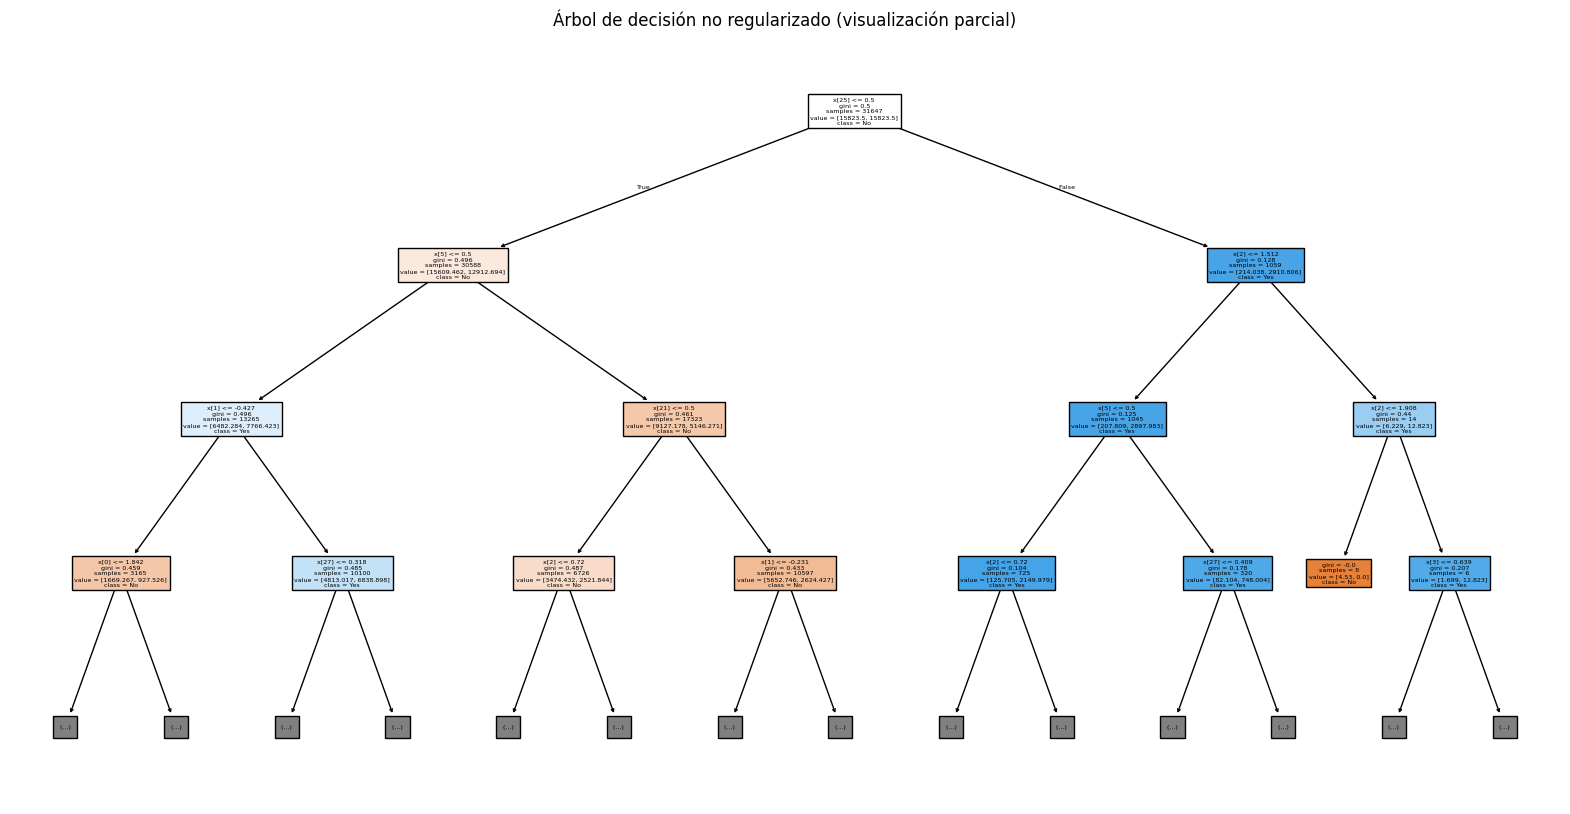

In [ ]:
#Librerias
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Se entrena el árbol de decisión "modelo no regularizado".
dtree = DecisionTreeClassifier(
    class_weight='balanced',  # para manejar desbalance de clases
    random_state=123
)

dtree.fit(X_train, y_train)

# Predicciones training
y_tpred_dtree = dtree.predict(X_train)

# Predicciones test
y_pred_dtree = dtree.predict(X_test)

# F1 Score training set
f1_train = f1_score(y_train, y_tpred_dtree)
print(f"F1 Score en training: {f1_train:.4f}")

# F1 Score test set
f1_test = f1_score(y_test, y_pred_dtree)
print(f"F1 Score en test: {f1_test:.4f}")


# visualización gráfica con 3 de profundidad
plt.figure(figsize=(20, 10))
plot_tree(dtree,
          filled=True,
          max_depth=3,
          feature_names=None,
          class_names=['No', 'Yes'])
plt.title("Árbol de decisión no regularizado (visualización parcial)")
plt.show()






---

*Respuesta*

> Dado que el conjunto de datos presenta un desbalance importante entre las clases (alrededor de 88% clase negativa y 12% positiva), se utilizó la opción `class_weight='balanced'` para penalizar adecuadamente los errores en la clase minoritaria.

> El modelo fue evaluado sobre el conjunto de prueba utilizando el F1 Score, alcanzando un F1 Score de 0.2795 sobre el conjunto de prueba. Este valor, relativamente bajo, refleja una débil capacidad del modelo para capturar correctamente los casos positivos, que en este problema corresponden a los clientes que efectivamente aceptaron la oferta del depósito a plazo. A pesar de incorporar `class_weight='balanced'` para mitigar el desbalance de clases, el modelo presenta síntomas claros de sobreajuste, probablemente debido a la ausencia de restricciones sobre la profundidad del árbol o el número mínimo de muestras por nodo. Esto sugiere la necesidad de incorporar estrategias de regularización en versiones posteriores del modelo. En datos de entrenamiento está sobreajustado.
Es decir, memoriza perfectamente el training set pero no generaliza bien a nuevos datos (test set).

> Además, se graficó una versión parcial del árbol (hasta 3 niveles de profundidad) para visualizar la lógica de partición. El árbol no regularizado tiende a sobreajustar los datos de entrenamiento, generando una estructura muy profunda y específica, lo que puede llevar a una generalización deficiente en nuevos datos. Esta observación justifica la necesidad de introducir regularización (por ejemplo, limitar la profundidad o el número mínimo de muestras por hoja) en pasos posteriores.



---


### Pegunta 1.7

En el contexto particular de una campaña de marketing, donde probablemente la mayoría de clientes no harán depósitos, es importante identificar correctamente tanto los clientes que harán depósitos (clase minoritaria), como los clientes que no harán depósitos.

En el primer caso, falsos negativos implican un cliente peridido. En el segundo caso, falsos positivos implicarían un gasto de marketing innecesario en clientes que no son de interés. En este sentido, si clasificamos a todos los clientes como individuos que no harán depósitos, el _accuracy_ será muy alto, pero el costo económico será muy grande.

Para penalizar tanto falsos positivos, como falsos negativos, a la vez que se busca maximizar los verdaderos positivos, nos enfocaremos en la métrica de _performance_ $F_1\ Score$.

Calcule el $F_1\ Score$ de su árbol no regularizado con la muestra de prueba. ¿Considera que es un buen valor? Comente.

In [ ]:
#Se calculo en el inciso anterior

f1 = f1_score(y_test, y_pred_dtree)
print(f"F1 Score en test: {f1:.4f}")

# Resultado: 0.2795



F1 Score en test: 0.2795





---


*Respuesta*

> El Árbol de Decisión no regularizado alcanzó un F1 Score de 0.2795 en la muestra de prueba. Este valor es considerablemente bajo, especialmente si se considera el contexto de la campaña de marketing, en el cual el objetivo es identificar con precisión a los clientes que podrían estar interesados en contratar un depósito a plazo. En este tipo de problemas, donde la clase positiva es minoritaria, un modelo puede lograr un alto accuracy simplemente prediciendo que todos los clientes no harán depósitos, pero esto no aporta valor real al negocio.

> Al enfocarnos en el F1 Score —una métrica que balancea precisión y recall— observamos que el modelo no logra capturar adecuadamente la clase de interés, lo que implica tanto una pérdida de potenciales clientes (falsos negativos) como un gasto innecesario en contactar a clientes no interesados (falsos positivos). Este resultado sugiere que el modelo está sobreajustado al conjunto de entrenamiento y no generaliza bien.



---


### Pregunta 1.8

Entrene un árbol clasificador con profundad máxima del árbol igual a 16. Llamaremos a este, "modelo levemente regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de prueba.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

F1 Score del modelo regularizado (max_depth=16): 0.3086


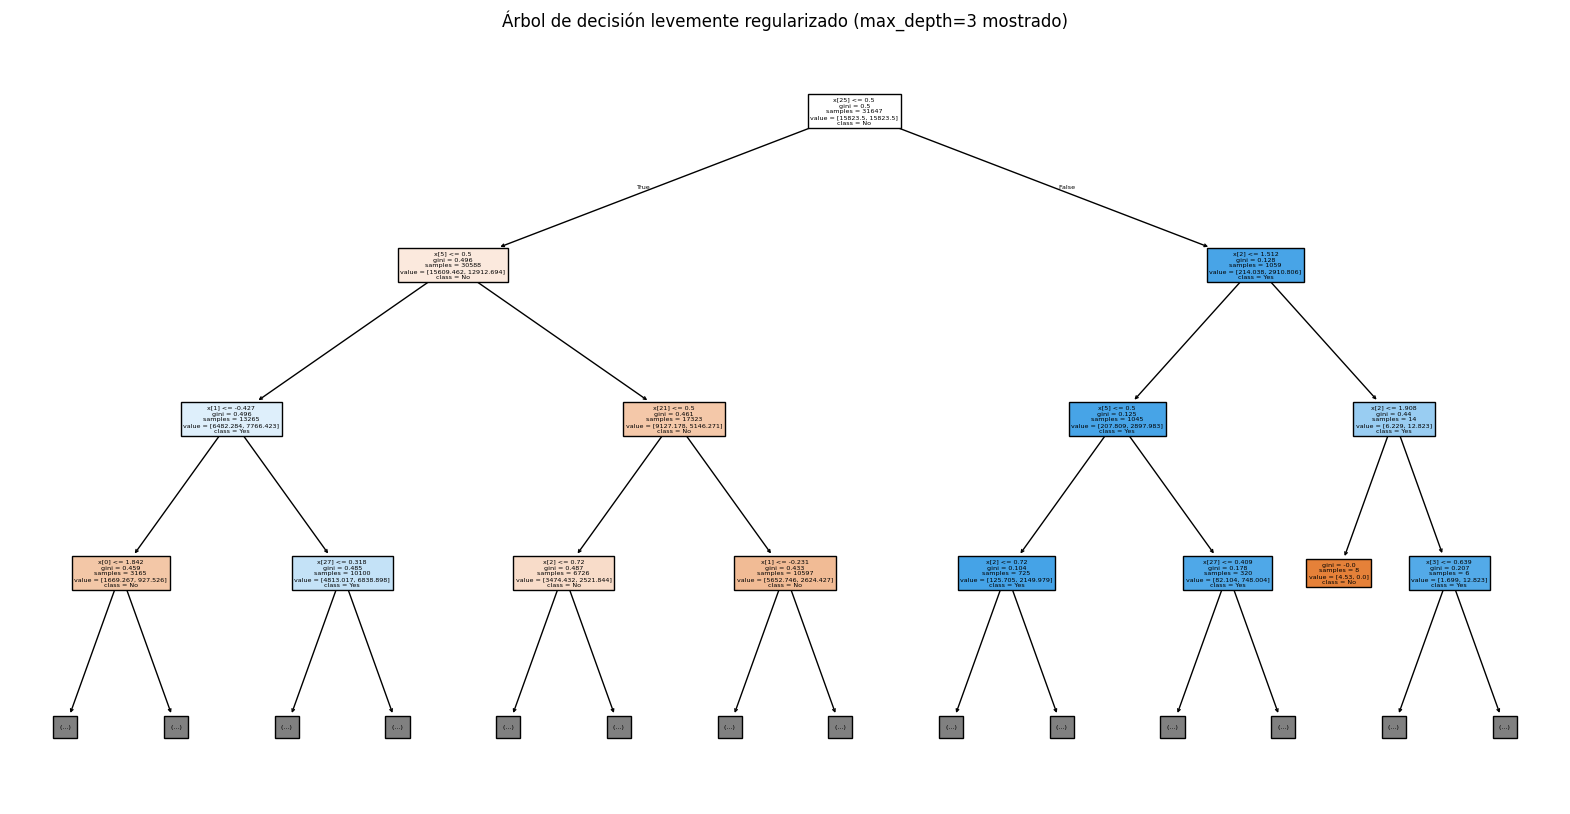

In [ ]:
# Árbol con profundidad máxima = 16 y pesos balanceados

dtree_reg = DecisionTreeClassifier(
    max_depth=16,
    class_weight='balanced',
    random_state=123
)

dtree_reg.fit(X_train, y_train)

#F1 Score
y_pred_reg = dtree_reg.predict(X_test)
f1_reg = f1_score(y_test, y_pred_reg)
print(f"F1 Score del modelo regularizado (max_depth=16): {f1_reg:.4f}")

#Grafica del árbol (profundidad limitada para visualización)

plt.figure(figsize=(20, 10))
plot_tree(dtree_reg,
          max_depth=3,       # mostrar solo los primeros niveles
          filled=True,
          class_names=['No', 'Yes'])
plt.title("Árbol de decisión levemente regularizado (max_depth=3 mostrado)")
plt.show()





---


*Respuesta*
> Se entrenó un árbol de decisión levemente regularizado, limitando su profundidad máxima a 16 e incorporando la opción `class_weight='balanced'` para corregir el desbalance en la variable objetivo. Este modelo obtuvo un F1 Score de 0.3086 en la muestra de prueba, lo que representa una mejora respecto al modelo no regularizado, cuyo F1 Score fue 0.2795. Esta diferencia sugiere que la regularización permitió al árbol evitar el sobreajuste, mejorando así su capacidad de generalización. Si bien la mejora no es drástica, es significativa en un contexto donde el objetivo es capturar correctamente a los clientes que sí contratarían un depósito a plazo. La visualización del árbol hasta una profundidad de 3 niveles permite observar las decisiones iniciales del modelo de forma más clara y comprensible, manteniendo interpretabilidad sin comprometer la precisión del análisis.



---


### Pregunta 1.9

Entrene un árbol clasificador con profundad máxima del árbol igual a 8. Llamaremos a este, "modelo regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de prueba.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?


F1 Score del modelo regularizado (max_depth=8): 0.4117


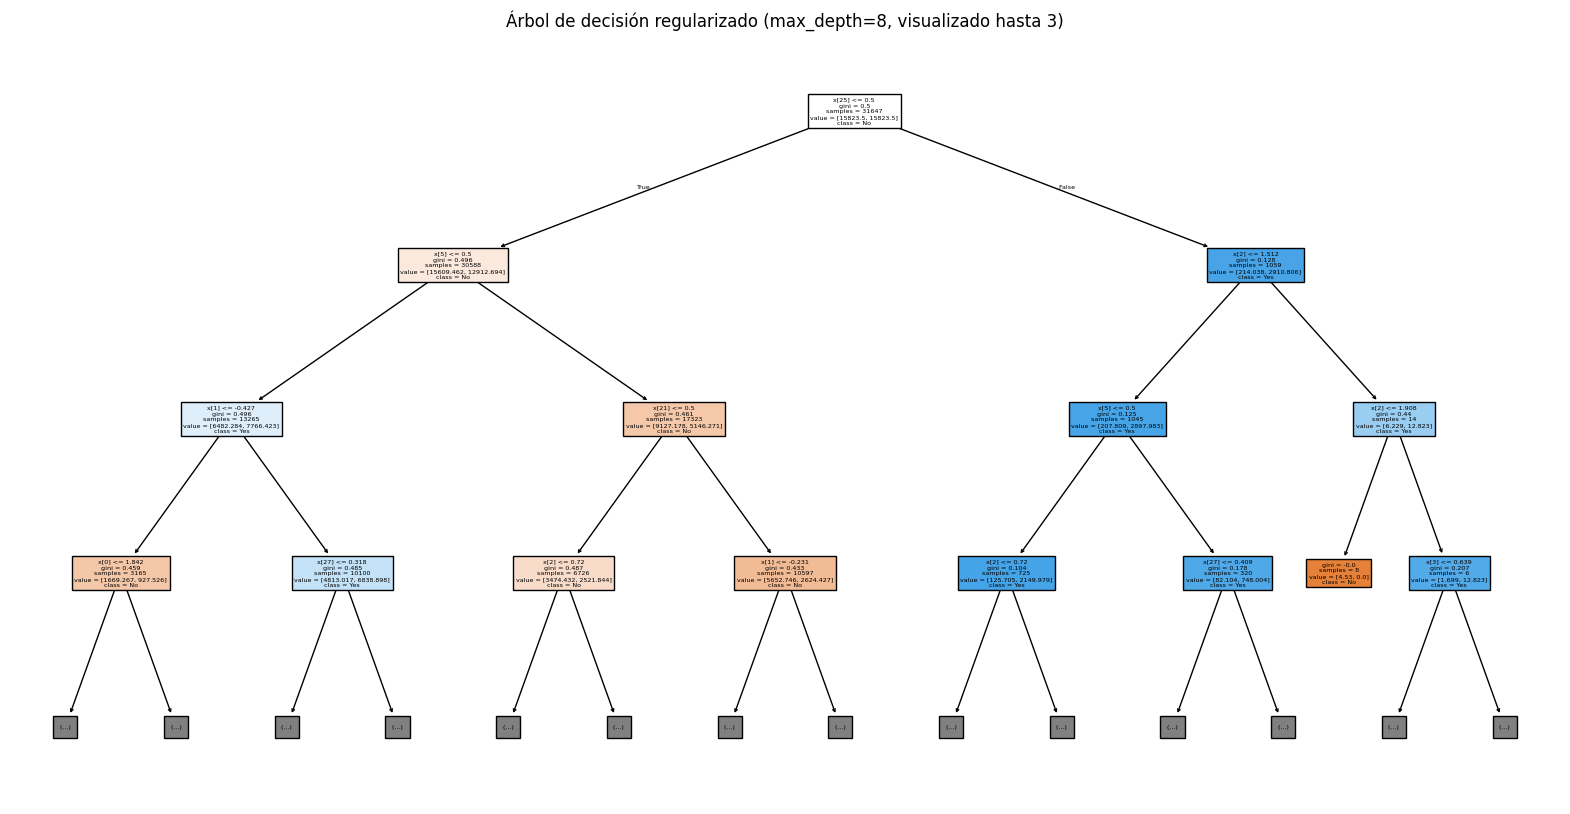

In [ ]:
# Árbol con profundidad máxima = 8
dtree_reg8 = DecisionTreeClassifier(
    max_depth=8,
    class_weight='balanced',
    random_state=123
)

dtree_reg8.fit(X_train, y_train)

#F1 Score
y_pred_reg8 = dtree_reg8.predict(X_test)
f1_reg8 = f1_score(y_test, y_pred_reg8)
print(f"F1 Score del modelo regularizado (max_depth=8): {f1_reg8:.4f}")

#Gráfico

plt.figure(figsize=(20, 10))
plot_tree(dtree_reg8,
          max_depth=3,  # visualizar hasta nivel 3
          filled=True,
          class_names=['No', 'Yes'])
plt.title("Árbol de decisión regularizado (max_depth=8, visualizado hasta 3)")
plt.show()





---


*Respuesta*

> Se entrenó un árbol de decisión con una profundidad máxima de 8, lo que representa un modelo regularizado con menor complejidad estructural respecto a los anteriores.

>Se mantuvo el parámetro `class_weight='balanced'` para compensar el desbalance entre las clases objetivo. Este modelo alcanzó un F1 Score de 0.4117 en la muestra de prueba, lo que representa una mejora considerable respecto a los modelos anteriores: 0.2795 para el árbol sin restricción y 0.3086 para el modelo con profundidad máxima de 16.

>Esta evolución indica que, en este caso, una mayor regularización mejora el equilibrio entre precisión y recall, logrando identificar de forma más efectiva a los clientes que sí contratan el depósito a plazo sin sobreajustarse al conjunto de entrenamiento.

---


### Pregunta 1.10

Entrene 20 árboles de clasificación. Cada uno de ellos debe estar entrenado fijando la profundidad máxima del árbol `max_depth` igual a $n \in [1,20]$. Obtenga el $F_1\ Score$ de cada árbol con la base de entrenamiento y la base de prueba.

Gafique en una misma figura $F_1\ Score$ de entrenamiento contra $n$ y $F_1\ Score$ de prueba contra $n$ (Eje X = $n$). ¿Cuál parece ser el parámetro óptimo $n^*$ para el árbol? ¿Qué puede decir sobre el parámetro sobre _overfitting_ y generalización?

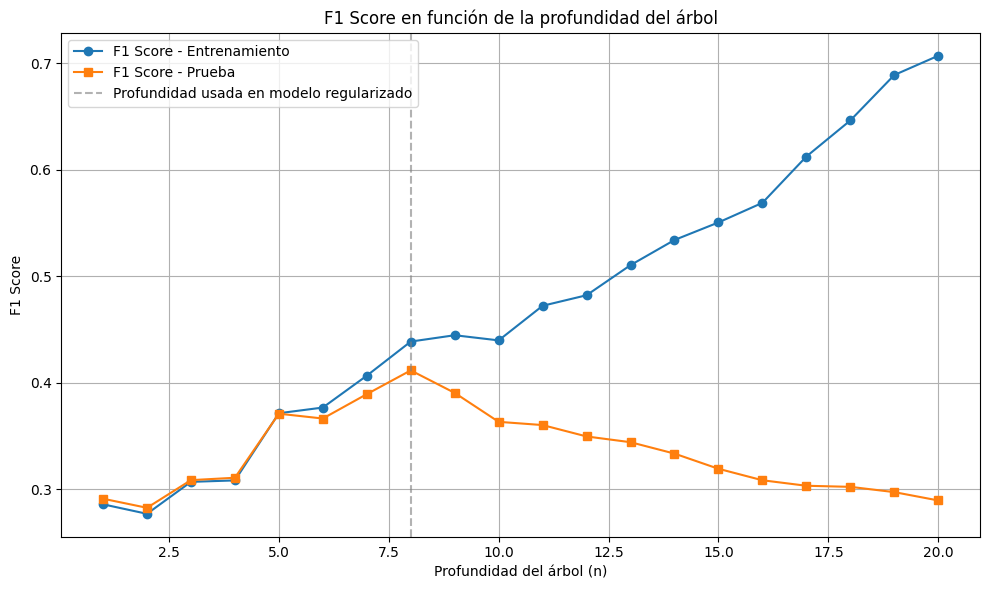

In [ ]:
# guardar resultados
depths = list(range(1, 21))
f1_train_scores = []
f1_test_scores = []

# Loop para entrenar árboles con distintas profundidades
for depth in depths:
    clf = DecisionTreeClassifier(
        max_depth=depth,
        class_weight='balanced',
        random_state=123
    )
    clf.fit(X_train, y_train)

    # Predicciones
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # F1 Scores
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)

    f1_train_scores.append(f1_train)
    f1_test_scores.append(f1_test)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(depths, f1_train_scores, label='F1 Score - Entrenamiento', marker='o')
plt.plot(depths, f1_test_scores, label='F1 Score - Prueba', marker='s')
plt.axvline(x=8, color='gray', linestyle='--', alpha=0.6, label='Profundidad usada en modelo regularizado')
plt.xlabel('Profundidad del árbol (n)')
plt.ylabel('F1 Score')
plt.title('F1 Score en función de la profundidad del árbol')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




---


*Respuesta*

> Se entrenaron 20 árboles de decisión, cada uno con una profundidad máxima (`max_depth`) distinta entre 1 y 20, con el objetivo de analizar cómo este parámetro afecta el desempeño del modelo. El parámetro `max_depth` controla directamente la complejidad del árbol: a profundidades muy bajas, el modelo tiene alta sesgo y no logra capturar adecuadamente las relaciones entre las variables, lo que se refleja en F1 Scores bajos tanto en entrenamiento como en prueba. A medida que se incrementa la profundidad, el modelo se vuelve más flexible y mejora su ajuste sobre los datos de entrenamiento, lo que inicialmente también mejora el desempeño sobre el conjunto de prueba. Sin embargo, a partir de cierta profundidad —específicamente mayor a 8 en este caso— el modelo comienza a memorizar los datos, lo que se traduce en un incremento artificial del F1 Score en entrenamiento, pero una caída en el F1 Score en prueba.

> Este comportamiento es una manifestación típica del **sobreajuste (overfitting)**: el modelo aprende patrones específicos e incluso ruido del conjunto de entrenamiento, perdiendo capacidad de generalización frente a nuevos datos. El gráfico generado confirma esta dinámica: el F1 Score en entrenamiento crece de forma sostenida con


>Por tanto, se concluye que `n* = 8` representa la profundidad óptima, ya que proporciona el mejor equilibrio entre capacidad de aprendizaje y generalización.

---


### Pregunta 1.11

En esta pregunta deberá entrenar _Random Forest Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Realice _Cross Validation_ con un _folding_ con `K=5` y calcule $F_1\ Score$ de todas las posibles combinaciones de los siguientes parámetros:

- `n_estimators = {100, 1000}`
- `max_depth = {10, 50, 100}`
- `min_samples_leaf = {2, 4}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta. Finalmente, reporte el $F_1\ Score$ con la muestra de prueba.

Cuando realice _Cross Validation_ y cuando entrene el modelo final, asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `RandomForestClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.



In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# grid de parámetros
param_grid = {
    'n_estimators': [100, 1000],
    'max_depth': [10, 50, 100],
    'min_samples_leaf': [2, 4]
}

#Cross Validation con K=5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# modelo base con class_weight para manejar desbalance
rf = RandomForestClassifier(class_weight='balanced', random_state=123)

# Configuración de grid search con F1 como métrica de evaluación
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Ejecutar búsqueda
grid_search.fit(X_train, y_train)

# mejor combinación de parámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


# Entrenamiento del modelo final con los mejores parámetros
best_rf = RandomForestClassifier(
    **grid_search.best_params_,
    class_weight='balanced',
    random_state=123
)

best_rf.fit(X_train, y_train)

# Predecir en test
y_pred_rf = best_rf.predict(X_test)

# Calcular F1 Score con set de prueba
f1_rf = f1_score(y_test, y_pred_rf)
print(f"F1 Score en test del Random Forest final: {f1_rf:.4f}")



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros encontrados:
{'max_depth': 50, 'min_samples_leaf': 4, 'n_estimators': 1000}
F1 Score en test del Random Forest final: 0.4400


*Comentario*

>Se realizó un proceso de búsqueda en malla (GridSearchCV) con validación cruzada de 5 pliegues para encontrar la mejor combinación de hiperparámetros del modelo Random Forest. Se exploraron diferentes valores para el número de árboles (`n_estimators`), la profundidad máxima (`max_depth`) y el mínimo de observaciones por hoja (`min_samples_leaf`). En total, se evaluaron 60 combinaciones posibles.

La mejor configuración encontrada fue:

    - max_depth: 50
    - min_samples_leaf: 4
    - n_estimators: 1000

Esta combinación logró un F1 Score de 0.4400 en el conjunto de prueba, lo que representa una mejora significativa en comparación con los árboles de decisión entrenados previamente sin ajuste tan finos.

### Pregunta 1.12

En esta pregunta deberá entrenar _XGBoost  Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Repita el ejercicio de _Cross Validation_ anterior, pero está vez evaluando:

- `n_estimators = {100, 1000}`
- `max_depth = {5, 50, 100}`
- `learning_rate = {0.05, 0.1, 0.5}`
- `max_leaves= {2, 4, 10}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta, reportando el $F_1\ Score$ con la muestra de prueba.

Asegúrese de que sus modelos sean capaces de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `XGBClassifier()` (parámetros de inicialización): https://xgboost.readthedocs.io/en/latest/python/python_api.html.


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier(random_state = 12)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test) ##accuracy en el test set 0.89


0.8908139191978768

In [ ]:

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Calcular peso para desbalance
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Espacio de búsqueda
param_grid = {
    'n_estimators': [100, 1000],
    'max_depth': [5, 50, 100],
    'learning_rate': [0.05, 0.1, 0.5],
    'max_leaves': [2, 4, 10]
}

# Modelo base
xgb = XGBClassifier(random_state=12, scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')

# Grid search con F1 Score
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1', return_train_score=True, verbose=1)
grid_search.fit(X_train, y_train)

# Mostrar mejor combinación
print("Mejores hiperparámetros:", grid_search.best_params_)

# Entrenar modelo final
best_params = grid_search.best_params_
xgb_final = XGBClassifier(random_state=12, scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', **best_params)
xgb_final.fit(X_train, y_train)

# Predecir y evaluar
y_pred_xgb = xgb_final.predict(X_test)
f1 = f1_score(y_test, y_pred_xgb)
print("F1 Score final:", f1)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 5, 'max_leaves': 10, 'n_estimators': 100}
F1 Score final: 0.4232827832292596


*Respuesta: Resultados del modelo XGBoost con Hiperparámetros Óptimos*


Se realizó un proceso de ajuste de hiperparámetros (*hyperparameter tuning*) utilizando `GridSearchCV` con validación cruzada de (K=5).

- `n_estimators`: [100, 1000]
- `max_depth`: [5, 50, 100]
- `learning_rate`: [0.05, 0.1, 0.5]
- `max_leaves`: [2, 4, 10]

El modelo final fue entrenado con la mejor combinación encontrada:

- `learning_rate = 0.1`
- `max_depth = 5`
- `max_leaves = 10`
- `n_estimators = 100`

Además, se incorporó el parámetro `scale_pos_weight` para lidiar con el desbalance de clases, asegurando que la clase minoritaria (clientes que sí aceptan el depósito) tuviera un peso proporcionalmente mayor durante el entrenamiento.

El desempeño final del modelo, medido con **F1 Score sobre la muestra de prueba**, fue de **0.423**, lo cual representa una mejora considerable respecto al árbol de decisión no regularizado y regularizado, y además se alinea con el objetivo del problema, que prioriza la correcta identificación de clientes propensos a aceptar la oferta sin descuidar los costos de falsos positivos.

### Pregunta 1.13

Entrene un modelo _Naïve Bayes_. Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `GaussianNB()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# 1. Entrenar el modelo Naïve Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# 2. Predicción en entrenamiento
y_pred_train = nb.predict(X_train)
f1_train = f1_score(y_train, y_pred_train)
print(f"F1 Score en entrenamiento (Naïve Bayes): {f1_train:.4f}")

# 3. Predicción en test
y_pred_test = nb.predict(X_test)

# 4. Evaluación en test
cm = confusion_matrix(y_test, y_pred_test)
acc = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("\nMatriz de Confusión (Test):")
print(cm)
print(f"Accuracy en test: {acc:.4f}")
print(f"F1 Score en test (Naïve Bayes): {f1_test:.4f}")




F1 Score en entrenamiento (Naïve Bayes): 0.3265

Matriz de Confusión (Test):
[[10159  1818]
 [  898   689]]
Accuracy en test: 0.7998
F1 Score en test (Naïve Bayes): 0.3366


In [ ]:
nb.score(X_train, y_train)  # Classification accuracy en training

0.7950832622365469



---



## Análisis Comparativo de Modelos de Clasificación


### Pregunta 1.14

Evalúe y compare el desempeño de los modelos teniendo en cuenta la naturaleza del conjunto de datos. ¿Cómo afectó el desbalance a cada modelo? ¿Qué modelo manejó mejor el balance o desbalance de clases y cuáles son sus conclusiones generales sobre su rendimiento comparado?

Para que la comparación sea clara, es útil indicar qué métricas de evaluación utilizo para comparar los modelos (por ejemplo, F1-score, precisión, recall, AUC, etc.).

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score


# Diccionario para almacenar resultados
model_results = {}

# Asegúrate de tener estas variables definidas previamente:
# y_test: variable objetivo del test
# predicciones: dt_pred_test, dt16_pred_test, dt8_pred_test, rf_pred_test, xgb_pred_test, nb_pred_test
# modelos: dt, dt16, dt8, rf_final, xgb_final, nb

model_results["Árbol No Regularizado"] = {
    "F1 Score": f1_score(y_test, y_pred_dtree),
    "Accuracy": accuracy_score(y_test, y_pred_dtree),
    "Precision": precision_score(y_test, y_pred_dtree),
    "Recall": recall_score(y_test, y_pred_dtree),
    "AUC": roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1])
}

model_results["Árbol Levemente Regularizado (depth=16)"] = {
    "F1 Score": f1_score(y_test, y_pred_reg),
    "Accuracy": accuracy_score(y_test, y_pred_reg),
    "Precision": precision_score(y_test, y_pred_reg),
    "Recall": recall_score(y_test, y_pred_reg),
    "AUC": roc_auc_score(y_test, dtree_reg.predict_proba(X_test)[:, 1])
}

model_results["Árbol Regularizado (depth=8)"] = {
    "F1 Score": f1_score(y_test, y_pred_reg8),
    "Accuracy": accuracy_score(y_test, y_pred_reg8),
    "Precision": precision_score(y_test, y_pred_reg8),
    "Recall": recall_score(y_test, y_pred_reg8),
    "AUC": roc_auc_score(y_test, dtree_reg8.predict_proba(X_test)[:, 1])
}

model_results["Random Forest"] = {
    "F1 Score": f1_score(y_test, y_pred_rf),
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "AUC": roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
}

model_results["XGBoost"] = {
    "F1 Score": f1_score(y_test, y_pred_xgb),
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "AUC": roc_auc_score(y_test, xgb_final.predict_proba(X_test)[:, 1])
}

# Guardar métricas del modelo Naïve Bayes
model_results["Naïve Bayes"] = {
    "F1 Score": f1_score(y_test, y_pred_test),
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test),
    "Recall": recall_score(y_test, y_pred_test),
    "AUC": roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])  # probabilidad de clase 1
}

# Resultados en DataFrame

results_df = pd.DataFrame(model_results).T
results_df


,F1 Score,Accuracy,Precision,Recall,AUC
Árbol No Regularizado,0.279530,0.828222,0.274438,0.284814,0.592548
Árbol Levemente Regularizado (depth=16),0.308634,0.766809,0.236278,0.444865,0.624906
Árbol Regularizado (depth=8),0.411688,0.833751,0.351291,0.497164,0.724973
Random Forest,0.440038,0.868844,0.439623,0.440454,0.762684
XGBoost,0.423283,0.809348,0.327580,0.597984,0.772994
Naïve Bayes,0.336590,0.799764,0.274830,0.434152,0.701201





---


*Respuesta:* Análisis Comparativo de Modelos de Clasificación



Se evaluaron y compararon seis modelos de clasificación aplicados al dataset de campañas de marketing, teniendo en cuenta la naturaleza desbalanceada del conjunto de datos. Para una comparación rigurosa, se utilizaron cuatro métricas clave:

- **Precisión**: proporción de predicciones positivas que realmente son positivas.
- **Recall (Sensibilidad)**: capacidad de identificar correctamente los casos positivos.
- **F1 Score**: medida armónica entre precisión y recall. Es particularmente útil en contextos con clases desbalanceadas.
- **AUC (Área Bajo la Curva ROC)**: representa la capacidad general del modelo para distinguir entre clases.


#### Interpretación

Los resultados muestran que el **modelo de Random Forest** obtuvo el mejor F1 Score (`0.4400`) y una AUC alta (`0.7629`), lo que evidencia su buena capacidad para predecir correctamente a los clientes que sí aceptarían la campaña, sin generar tantos falsos positivos. Le sigue de cerca **XGBoost**, con un F1 Score de `0.4233` y el mayor valor de AUC (`0.7729`), lo que sugiere una excelente capacidad de discriminación, aunque su precisión fue algo menor. Ambos modelos fueron capaces de manejar el desbalance mediante la incorporación de `class_weight='balanced'` o `scale_pos_weight`, junto con un ajuste fino de hiperparámetros mediante validación cruzada.

Los **árboles de decisión**, por su parte, mostraron una mejora progresiva a medida que se regularizó su complejidad. El árbol regularizado con `max_depth=8` alcanzó un F1 Score de `0.4117`, superior al árbol no regularizado (`0.2795`) y al árbol levemente regularizado (`0.3086`), confirmando que limitar la profundidad ayuda a evitar el sobreajuste y mejora la capacidad de generalización en datos desbalanceados.

Por otro lado, el **modelo Naïve Bayes**, aunque sencillo y computacionalmente eficiente, mostró un desempeño inferior con un F1 Score de `0.3366`. Si bien su recall fue relativamente alto (`0.4341`), la baja precisión indica que generó una gran cantidad de falsos positivos, lo cual puede ser costoso en campañas reales.

En conclusión el desbalance en los datos afecta negativamente a los modelos no regularizados, que tienden a favorecer la clase mayoritaria. Modelos como **XGBoost** y **Random Forest**, especialmente tras un ajuste fino de hiperparámetros, lograron manejar adecuadamente este desbalance, mostrando una clara superioridad en métricas clave como F1 Score y AUC.

Por tanto, se concluye que **XGBoost es el mejor modelo en este contexto**, seguido muy de cerca por Random Forest, ambos adecuados para predecir el comportamiento de clientes en campañas de marketing con clases desbalanceadas.



---


# KMeans & PCA

La guerra comercial desatada levanta un montón de preguntas de interés en economía. Una de estas es: ¿Qué países sufrirán de forma similar las consecuencias de esta? ¿Quiénes serían ganadores? ¿Quienes serían perdedores?

En esta parte exploraremos el aporte que los métodos de Clustering de Machine Learning pueden hacer a la respuesta de esta cuestión. Nos enfocaremos en variables relacionadas al comercio exterior para determinar similitud entre grupos de países. Más específicamente, en variables relacionadas a las exportaciones.

Para esto, considere las siguientes variables que describen el perfil exportador de cada país:

- GDP growth (annual %)
- Agricultural raw materials exports (% of merchandise exports)
- Computer, communications and other services (% of commercial service exports)
- Exports of goods and services (% of GDP)
- Food exports (% of merchandise exports)
- Fuel exports (% of merchandise exports)
- High-technology exports (% of manufactured exports)
- ICT service exports (% of service exports, BoP)
- Insurance and financial services (% of service exports, BoP)
- International tourism, receipts (% of total exports)
- Manufactures exports (% of merchandise exports)
- Merchandise exports to high-income economies (% of total merchandise exports)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
- Ores and metals exports (% of merchandise exports)
- Taxes on exports (% of tax revenue)
- Transport services (% of commercial service exports)


La idea será determinar similitud entre países y las variables qué son más relevantes a la hora de determinarla.

Debido a que 2023 es el año reciente con una mayor riqueza de datos, y debido a que nos interesan cambios respecto al _status quo_ en el contexto actual, trabajaremos con datos sólo de aquel año.

Database Source: World bank & Trade Analysis Information System.



### Pregunta 2.0

Cargue la base de datos disponible en el siguiente link: https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.cs.

En el siguiente link podrá encontrar información adicional sobre el _dataset_ por si lo llega a necesitar: https://github.com/olherreragz/EAE3709-2025-1/blob/main/T2_data/Series_Metadata.csv.

Elimine las columnas `"Series Code"` y `"Country Code"`. Luego, transforme su _dataframe_ de formato _Long_ a _Wide_. Su _dataframe_ final deberá contener una columna que indique el nombre del país y columnas que indiquen la medida de exportación correspondiente:

`<Country>, <SeriesName1>, <SeriesName2> ....`



![Long to Wide Format](https://tavareshugo.github.io/r-intro-tidyverse-gapminder/fig/07-data_shapes.png)




In [1]:
# Librerias a uutilizar 
# Manipulación de datos
import pandas as pd
import numpy as np
import os
import glob
import math
# Carga de datos de UCI
from ucimlrepo import fetch_ucirepo

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y transformación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# Modelos ML
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# XGBoost
!pip install xgboost
from xgboost import XGBClassifier

# Estadísticas
from scipy import stats
import statsmodels.api as sm

# Para leer Excel
import openpyxl

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

import textwrap


In [2]:
# 1. Cargar el dataset desde el link
url = "https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.csv"
df = pd.read_csv(url)
print(df.head())

             Series Name        Series Code    Country Name Country Code  \
0  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG     Afghanistan          AFG   
1  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG         Albania          ALB   
2  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG         Algeria          DZA   
3  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG  American Samoa          ASM   
4  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG         Andorra          AND   

      2023 [YR2023]  
0  2.71088679128353  
1  3.93662525742167  
2  4.10000000000004  
3                ..  
4  2.58355480961319  


In [3]:
# Elimino columnas innecesarias
df = df.drop(columns=["Series Code", "Country Code"], errors="ignore")
# Identifico la(s) columna(s) que contienen datos de años (aquí solo hay "2023 [YR2023]")
year_cols = [col for col in df.columns if "[YR" in col]
# Paso de wide (columnas de año) → long
df_long = df.melt(
    id_vars=["Series Name", "Country Name"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Value"
)
# Extraigo el número de año (si en el futuro hay más, o para filtrar)
df_long["Year"] = df_long["Year"].str.extract(r"(\d{4})").astype(int)
# Renombro las columnas para mayor claridad
df_long = df_long.rename(columns={
    "Series Name": "SeriesName",
    "Country Name": "Country"
})
# Pivotear “país × serie”
df_wide = df_long.pivot(
    index="Country",
    columns="SeriesName",
    values="Value"
).reset_index()
# limpiar nombres de columna quitando espacios o paréntesis
df_wide.columns = [
    col if col == "Country"
    else col.replace(" ", "_").replace("(", "").replace(")", "")
    for col in df_wide.columns
]

df_wide.head()

,Country,Agricultural_raw_materials_exports_%_of_merchandise_exports,Computer;_communications_and_other_services_%_of_commercial_service_exports,Exports_of_goods_and_services_%_of_GDP,Food_exports_%_of_merchandise_exports,Fuel_exports_%_of_merchandise_exports,GDP_growth_annual_%,High-technology_exports_%_of_manufactured_exports,ICT_service_exports_%_of_service_exports;_BoP,Insurance_and_financial_services_%_of_service_exports;_BoP,International_tourism;_receipts_%_of_total_exports,Manufactures_exports_%_of_merchandise_exports,Merchandise_exports_to_high-income_economies_%_of_total_merchandise_exports,Merchandise_exports_to_low-_and_middle-income_economies_in_Europe_&_Central_Asia_%_of_total_merchandise_exports,Ores_and_metals_exports_%_of_merchandise_exports,Taxes_on_exports_%_of_tax_revenue,Transport_services_%_of_commercial_service_exports
0,Afghanistan,..,..,16.7751362822863,..,..,2.71088679128353,..,..,..,..,..,12.8798269363707,9.68241869729934,..,..,..
1,Africa Eastern and Southern,1.93287526195653,35.9298385263195,24.3483372544611,14.285851632509,25.4254224001233,2.32013780158925,5.80516538196113,6.10657347896149,6.08028700896879,..,29.1304853698777,44.3959450802976,0.471789673271105,23.4925994471713,..,22.9754549072797
2,Africa Western and Central,3.80482687815641,23.7057568350145,..,12.9874441377748,61.3705691120184,3.3547328190002,..,5.69176863421842,14.9934752391386,..,6.76897203140647,54.1428772898838,3.17153807284374,4.3390849886261,..,36.2200117483328
3,Albania,0.406032063201426,24.4301090197124,38.6650817896799,11.9640780632637,6.34538423879421,3.93662525742167,0.682326849473647,3.01397608748124,0.662505307988438,..,56.6139655531231,77.7081307571647,19.5159727248964,5.34944752843742,..,10.9287529629646
4,Algeria,..,59.1626427564765,23.6195363708424,..,..,4.10000000000004,..,2.21311390791552,10.2830758414755,..,..,80.1800299622258,6.36723723188521,..,..,25.4709095419937


In [4]:
df = df_wide
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 17 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   Country                                                                                                          266 non-null    object
 1   Agricultural_raw_materials_exports_%_of_merchandise_exports                                                      266 non-null    object
 2   Computer;_communications_and_other_services_%_of_commercial_service_exports                                      266 non-null    object
 3   Exports_of_goods_and_services_%_of_GDP                                                                           266 non-null    object
 4   Food_exports_%_of_merchandise_exports       

### Pregunta 2.1

Debido a que la pregunta de interés es sobre identificación de grupos de países, elime filas donde `Country Name` sea igual a cualquiera de los siguientes valores:

- "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World"




In [5]:
# Definir la lista de grupos a eliminar:
groups_to_remove = [
    "Africa Eastern and Southern",
    "Africa Western and Central",
    "Arab World",
    "Caribbean small states",
    "Central Europe and the Baltics",
    "Early-demographic dividend",
    "East Asia & Pacific",
    "East Asia & Pacific (IDA & IBRD countries)",
    "East Asia & Pacific (excluding high income)",
    "Euro area",
    "Europe & Central Asia",
    "Europe & Central Asia (IDA & IBRD countries)",
    "Europe & Central Asia (excluding high income)",
    "European Union",
    "Fragile and conflict affected situations",
    "Heavily indebted poor countries (HIPC)",
    "High income",
    "IBRD only",
    "IDA & IBRD total",
    "IDA blend",
    "IDA only",
    "IDA total",
    "Late-demographic dividend",
    "Latin America & Caribbean",
    "Latin America & Caribbean (excluding high income)",
    "Latin America & the Caribbean (IDA & IBRD countries)",
    "Least developed countries: UN classification",
    "Low & middle income",
    "Low income",
    "Lower middle income",
    "Middle East & North Africa",
    "Middle East & North Africa (IDA & IBRD countries)",
    "Middle East & North Africa (excluding high income)",
    "Middle income",
    "North America",
    "Not classified",
    "OECD members",
    "Other small states",
    "Pacific island small states",
    "Post-demographic dividend",
    "Pre-demographic dividend",
    "Small states",
    "South Asia",
    "South Asia (IDA & IBRD)",
    "Sub-Saharan Africa",
    "Sub-Saharan Africa (IDA & IBRD countries)",
    "Sub-Saharan Africa (excluding high income)",
    "Upper middle income",
    "World"
]

# Filtrar df_wide para eliminar esas filas:
df_wide_clean = df[~df["Country"].isin(groups_to_remove)].copy()
#  Revisar cuántas filas se eliminaron:
n_before = df_wide.shape[0]
n_after = df_wide_clean.shape[0]
print(f"Filas antes de filtrar: {n_before}")
print(f"Filas después de filtrar: {n_after}")
print(f"Se eliminaron {n_before - n_after} filas correspondientes a grupos/regiones.\n")
# Mostrar las primeras filas de df_wide_clean para verificar el resultado
df_wide_clean.head()

Filas antes de filtrar: 266
Filas después de filtrar: 217
Se eliminaron 49 filas correspondientes a grupos/regiones.



,Country,Agricultural_raw_materials_exports_%_of_merchandise_exports,Computer;_communications_and_other_services_%_of_commercial_service_exports,Exports_of_goods_and_services_%_of_GDP,Food_exports_%_of_merchandise_exports,Fuel_exports_%_of_merchandise_exports,GDP_growth_annual_%,High-technology_exports_%_of_manufactured_exports,ICT_service_exports_%_of_service_exports;_BoP,Insurance_and_financial_services_%_of_service_exports;_BoP,International_tourism;_receipts_%_of_total_exports,Manufactures_exports_%_of_merchandise_exports,Merchandise_exports_to_high-income_economies_%_of_total_merchandise_exports,Merchandise_exports_to_low-_and_middle-income_economies_in_Europe_&_Central_Asia_%_of_total_merchandise_exports,Ores_and_metals_exports_%_of_merchandise_exports,Taxes_on_exports_%_of_tax_revenue,Transport_services_%_of_commercial_service_exports
0,Afghanistan,..,..,16.7751362822863,..,..,2.71088679128353,..,..,..,..,..,12.8798269363707,9.68241869729934,..,..,..
3,Albania,0.406032063201426,24.4301090197124,38.6650817896799,11.9640780632637,6.34538423879421,3.93662525742167,0.682326849473647,3.01397608748124,0.662505307988438,..,56.6139655531231,77.7081307571647,19.5159727248964,5.34944752843742,..,10.9287529629646
4,Algeria,..,59.1626427564765,23.6195363708424,..,..,4.10000000000004,..,2.21311390791552,10.2830758414755,..,..,80.1800299622258,6.36723723188521,..,..,25.4709095419937
5,American Samoa,..,..,..,..,..,..,..,..,..,..,..,73.1557182839582,0.7485445254755,..,..,..
6,Andorra,0.415383101399855,12.8811837923156,..,1.0898638304214,0.0101475994472374,2.58355480961319,21.4346319155008,4.34892555438222,3.72824437871563,..,94.9903929863838,..,..,1.77400635480091,..,1.65464266165053


In [17]:
df = df_wide_clean 

### Pregunta 2.2

Reemplace todos los valores `".."` por `NA`. Luego, transforme las columnas a variables numéricas y despliegue estadísticas descriptivas.


In [18]:
df.replace("..", pd.NA, inplace=True)

In [19]:
numeric_cols = [col for col in df.columns if col != "Country"]
df[numeric_cols] = df[numeric_cols].apply(
    pd.to_numeric, errors="coerce"
)
# describe() dará conteo, media, std, min, percentiles y max para cada columna numérica
stats = df[numeric_cols].describe()
# Para incluir también la columna 'Country' en el resultado, 
# no se puede describir texto numéricamente, pero sí puedes ver:
countries_list = df["Country"].tolist()
# Mostrar resultados
print("=== Estadísticas descriptivas de las columnas numéricas ===")
print(stats)

=== Estadísticas descriptivas de las columnas numéricas ===
       Agricultural_raw_materials_exports_%_of_merchandise_exports  \
count                                         149.000000             
mean                                            2.726255             
std                                             7.416283             
min                                             0.000000             
25%                                             0.343928             
50%                                             0.794963             
75%                                             2.120083             
max                                            63.703068             

       Computer;_communications_and_other_services_%_of_commercial_service_exports  \
count                                         161.000000                             
mean                                           35.005284                             
std                                            23.5

In [20]:
df.info() #Verficando la conversion 

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 0 to 265
Data columns (total 17 columns):
 #   Column                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                           --------------  -----  
 0   Country                                                                                                          217 non-null    object 
 1   Agricultural_raw_materials_exports_%_of_merchandise_exports                                                      149 non-null    float64
 2   Computer;_communications_and_other_services_%_of_commercial_service_exports                                      161 non-null    float64
 3   Exports_of_goods_and_services_%_of_GDP                                                                           158 non-null    float64
 4   Food_exports_%_of_merchandise_exports      

### Pregunta 2.3

Grafique la distribución empírica de todas las variables numéricas del dataset. Comente sobre cada una de ellas.

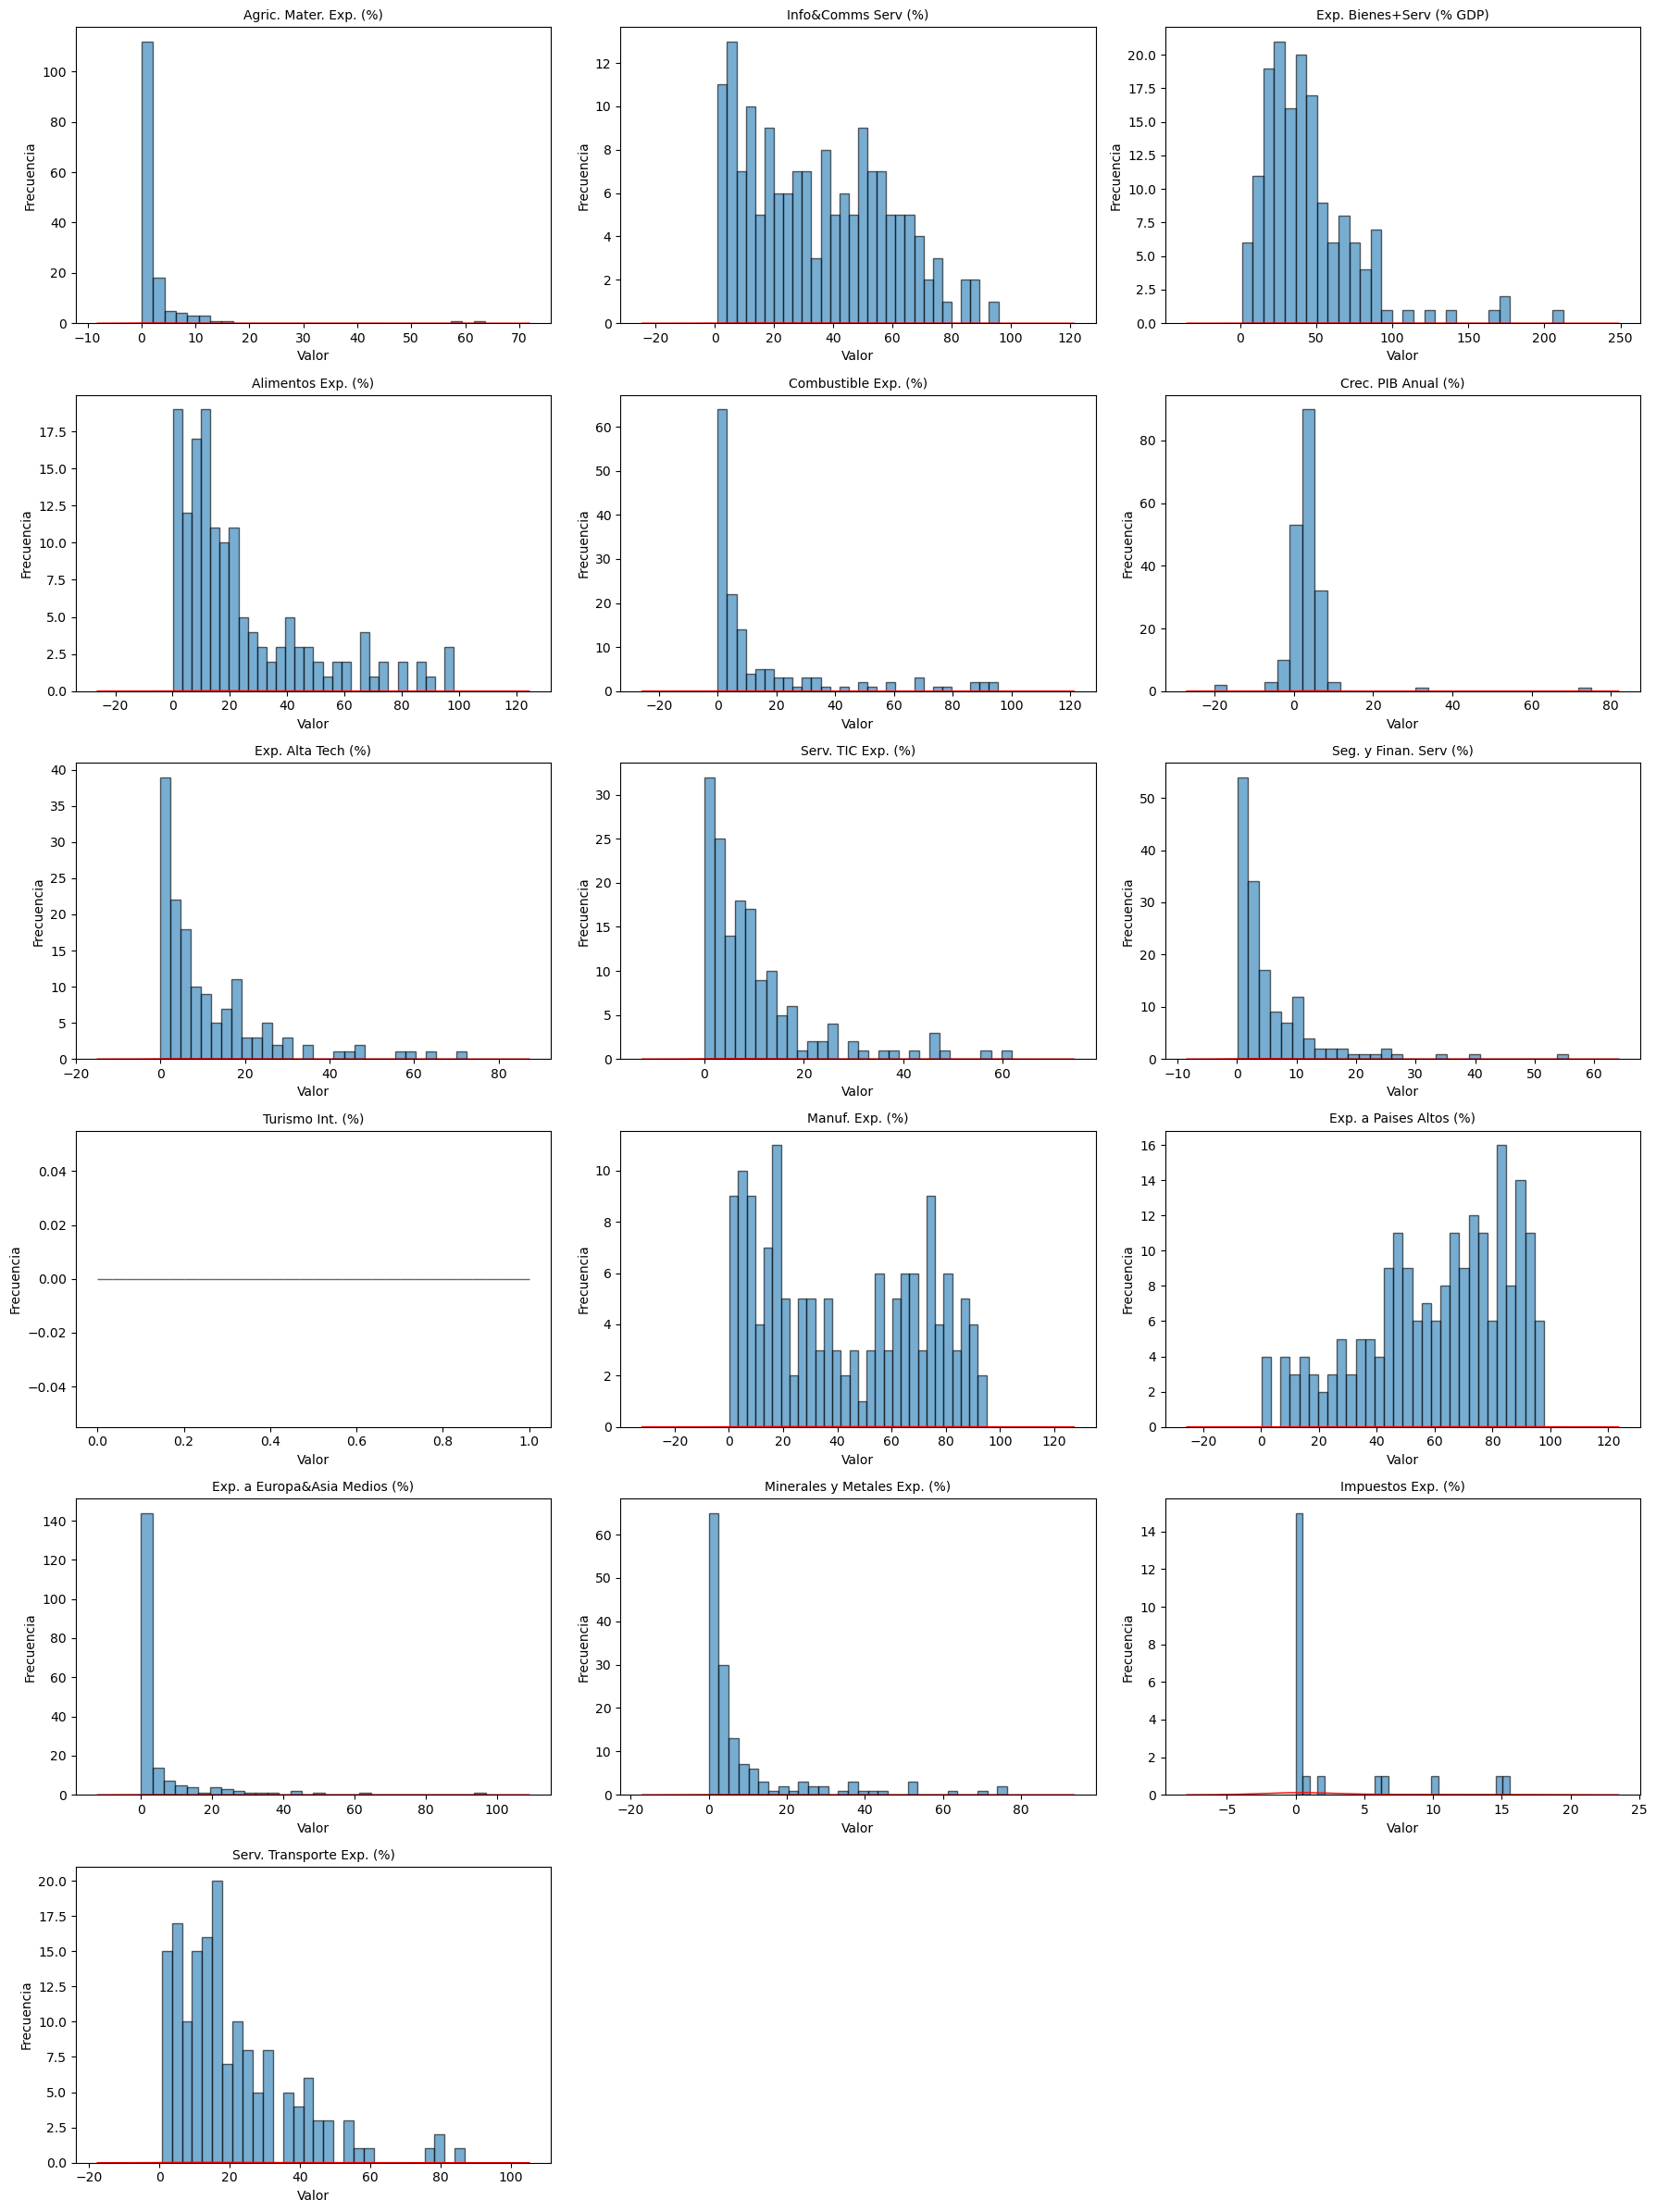

In [23]:
# Definir diccionario de nombres cortos
short_names = {
    "Agricultural_raw_materials_exports_%_of_merchandise_exports": "Agric. Mater. Exp. (%)",
    "Computer;_communications_and_other_services_%_of_commercial_service_exports": "Info&Comms Serv (%)",
    "Exports_of_goods_and_services_%_of_GDP": "Exp. Bienes+Serv (% GDP)",
    "Food_exports_%_of_merchandise_exports": "Alimentos Exp. (%)",
    "Fuel_exports_%_of_merchandise_exports": "Combustible Exp. (%)",
    "GDP_growth_annual_%": "Crec. PIB Anual (%)",
    "High-technology_exports_%_of_manufactured_exports": "Exp. Alta Tech (%)",
    "ICT_service_exports_%_of_service_exports;_BoP": "Serv. TIC Exp. (%)",
    "Insurance_and_financial_services_%_of_service_exports;_BoP": "Seg. y Finan. Serv (%)",
    "International_tourism;_receipts_%_of_total_exports": "Turismo Int. (%)",
    "Manufactures_exports_%_of_merchandise_exports": "Manuf. Exp. (%)",
    "Merchandise_exports_to_high-income_economies_%_of_total_merchandise_exports": "Exp. a Paises Altos (%)",
    "Merchandise_exports_to_low-_and_middle-income_economies_in_Europe_&_Central_Asia_%_of_total_merchandise_exports": "Exp. a Europa&Asia Medios (%)",
    "Ores_and_metals_exports_%_of_merchandise_exports": "Minerales y Metales Exp. (%)",
    "Taxes_on_exports_%_of_tax_revenue": "Impuestos Exp. (%)",
    "Transport_services_%_of_commercial_service_exports": "Serv. Transporte Exp. (%)"
    
}

# Número de variables
n_vars = len(numeric_cols)
ncols = 3
nrows = math.ceil(n_vars / ncols)

# Crear figura y ejes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    data = df[col].dropna()
    
    # Histograma
    ax.hist(data, bins=30, edgecolor='k', alpha=0.6)
    # KDE (si hay al menos 2 datos distintos)
    if len(data.unique()) > 1:
        sns.kdeplot(data, ax=ax, color='red', lw=1)
    
    # Obtener nombre corto si existe, sino usar original
    title_raw = short_names.get(col, col.replace("_", " "))
    # Envolver el texto para que no quede demasiado largo (ancho=30 caracteres)
    title_wrapped = "\n".join(textwrap.wrap(title_raw, width=30))
    
    ax.set_title(title_wrapped, fontsize=10)
    ax.set_xlabel("Valor")
    ax.set_ylabel("Frecuencia")

# Eliminar ejes sobrantes
for j in range(n_vars, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()




---
La mayoría de las variables numéricas del conjunto de datos muestran una tendencia de 'cola a la derecha', es decir, muchos países se agrupan en valores bajos mientras unos pocos presentan valores extremadamente altos. Esto es claro en exportaciones de materias agrícolas, combustibles, servicios TIC y minerales/metales, lo que indica que pocos países realmente se especializan en estas áreas. En cambio, variables como las exportaciones de manufacturas, las exportaciones a países de altos ingresos y las exportaciones de servicios de transporte tienen distribuciones más variadas, reflejando más diferencias entre países. Otras, como las exportaciones de bienes y servicios (% del PIB) y el crecimiento anual del PIB, se acercan más a una distribución normal, lo que facilita su uso en técnicas como el Análisis de Componentes Principales (PCA).
Un aspecto importante a destacar es que una variable (Turismo Internacional (%)) no muestra ninguna variación, por lo que debe eliminarse del análisis. En conjunto, la forma en que se distribuyen estas variables subraya la importancia de aplicar tratamientos previos, como transformaciones logarítmicas o el uso de métodos estadísticos robustos, para que los valores extremos no distorsionen los resultados. Este diagnóstico inicial es fundamental para preparar los datos adecuadamente antes de aplicar modelos estadísticos o técnicas de agrupamiento (clustering).

---


## Missing Values

### Pregunta 2.4

Realice análisis de valores vacíos y tratamiento de estos. Se premiará mantener el mayor número de observaciones posibles bajo criterios razonables. Luego de esta pregunta no deben quedar nulos en el _dataframe_ a utilizar.


In [24]:
# Resumen de valores faltantes por columna
missing_counts = df.isna().sum()
missing_percent = (missing_counts / df.shape[0]) * 100
missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_percent": missing_percent.round(2)
}).sort_values(by="missing_percent", ascending=False)
display(missing_summary)

,missing_count,missing_percent
International_tourism;_receipts_%_of_total_exports,217,100.00
Taxes_on_exports_%_of_tax_revenue,195,89.86
Fuel_exports_%_of_merchandise_exports,72,33.18
High-technology_exports_%_of_manufactured_exports,70,32.26
Manufactures_exports_%_of_merchandise_exports,68,31.34
Food_exports_%_of_merchandise_exports,68,31.34
Ores_and_metals_exports_%_of_merchandise_exports,68,31.34
Agricultural_raw_materials_exports_%_of_merchandise_exports,68,31.34
Insurance_and_financial_services_%_of_service_exports;_BoP,65,29.95
ICT_service_exports_%_of_service_exports;_BoP,60,27.65


In [25]:
# Eliminar columnas con ≥ 50% de valores faltantes
threshold_pct = 50.0
cols_to_drop = missing_summary[
    (missing_summary["missing_percent"] >= threshold_pct)
].index.tolist()
print(cols_to_drop)

['International_tourism;_receipts_%_of_total_exports', 'Taxes_on_exports_%_of_tax_revenue']


In [26]:
df_impute = df.drop(columns=cols_to_drop)

# Resumen tras eliminar esas columnas de mas del 50%
missing_counts_2 = df_impute.isna().sum()
missing_percent_2 = (missing_counts_2 / df_impute.shape[0]) * 100
missing_summary_2 = pd.DataFrame({
    "missing_count": missing_counts_2,
    "missing_percent": missing_percent_2.round(2)
}).sort_values(by="missing_percent", ascending=False)
display(missing_summary_2)

,missing_count,missing_percent
Fuel_exports_%_of_merchandise_exports,72,33.18
High-technology_exports_%_of_manufactured_exports,70,32.26
Agricultural_raw_materials_exports_%_of_merchandise_exports,68,31.34
Food_exports_%_of_merchandise_exports,68,31.34
Manufactures_exports_%_of_merchandise_exports,68,31.34
Ores_and_metals_exports_%_of_merchandise_exports,68,31.34
Insurance_and_financial_services_%_of_service_exports;_BoP,65,29.95
ICT_service_exports_%_of_service_exports;_BoP,60,27.65
Exports_of_goods_and_services_%_of_GDP,59,27.19
Computer;_communications_and_other_services_%_of_commercial_service_exports,56,25.81


In [27]:
# Imputar valores faltantes restantes usando la mediana
num_cols_remaining = [col for col in df_impute.columns if col != "Country"]

# Configuramos el imputador de mediana
imputer = SimpleImputer(strategy="median")

# Ajustamos e imputamos
df_imputed_values = pd.DataFrame(
    imputer.fit_transform(df_impute[num_cols_remaining]),
    columns=num_cols_remaining,
    index=df_impute.index
)

# Reconstruimos el DataFrame final con 'Country' + valores imputados
df_final = pd.concat([
    df_impute[["Country"]].reset_index(drop=True),
    df_imputed_values.reset_index(drop=True)
], axis=1)

# Verificar que ya no queden nulos
missing_final = df_final.isna().sum().sum()
print(f"\nValores faltantes totales tras imputación: {missing_final}")


Valores faltantes totales tras imputación: 0


In [28]:
#  Cantidad de valores imputados por columna
imputed_counts = missing_counts_2[num_cols_remaining] - df_final[num_cols_remaining].isna().sum()
imputed_summary = pd.DataFrame({
    "initial_missing": missing_counts_2[num_cols_remaining],
    "imputed_values": imputed_counts
}).sort_values(by="imputed_values", ascending=False)
display(imputed_summary)

,initial_missing,imputed_values
Fuel_exports_%_of_merchandise_exports,72,72
High-technology_exports_%_of_manufactured_exports,70,70
Agricultural_raw_materials_exports_%_of_merchandise_exports,68,68
Food_exports_%_of_merchandise_exports,68,68
Manufactures_exports_%_of_merchandise_exports,68,68
Ores_and_metals_exports_%_of_merchandise_exports,68,68
Insurance_and_financial_services_%_of_service_exports;_BoP,65,65
ICT_service_exports_%_of_service_exports;_BoP,60,60
Exports_of_goods_and_services_%_of_GDP,59,59
Computer;_communications_and_other_services_%_of_commercial_service_exports,56,56


In [29]:
# Mostrar primeras filas del DataFrame final (sin nulos)
print("\n=== Primeras filas del DataFrame final (sin nulos) ===")
display(df_final.head())


=== Primeras filas del DataFrame final (sin nulos) ===


,Country,Agricultural_raw_materials_exports_%_of_merchandise_exports,Computer;_communications_and_other_services_%_of_commercial_service_exports,Exports_of_goods_and_services_%_of_GDP,Food_exports_%_of_merchandise_exports,Fuel_exports_%_of_merchandise_exports,GDP_growth_annual_%,High-technology_exports_%_of_manufactured_exports,ICT_service_exports_%_of_service_exports;_BoP,Insurance_and_financial_services_%_of_service_exports;_BoP,Manufactures_exports_%_of_merchandise_exports,Merchandise_exports_to_high-income_economies_%_of_total_merchandise_exports,Merchandise_exports_to_low-_and_middle-income_economies_in_Europe_&_Central_Asia_%_of_total_merchandise_exports,Ores_and_metals_exports_%_of_merchandise_exports,Transport_services_%_of_commercial_service_exports
0,Afghanistan,0.794963,32.273353,16.775136,15.056512,4.097826,2.710887,6.030929,7.285006,3.203366,37.251121,12.879827,9.682419,3.138350,15.739129
1,Albania,0.406032,24.430109,38.665082,11.964078,6.345384,3.936625,0.682327,3.013976,0.662505,56.613966,77.708131,19.515973,5.349448,10.928753
2,Algeria,0.794963,59.162643,23.619536,15.056512,4.097826,4.100000,6.030929,2.213114,10.283076,37.251121,80.180030,6.367237,3.138350,25.470910
3,American Samoa,0.794963,32.273353,38.790357,15.056512,4.097826,2.960181,6.030929,7.285006,3.203366,37.251121,73.155718,0.748545,3.138350,15.739129
4,Andorra,0.415383,12.881184,38.790357,1.089864,0.010148,2.583555,21.434632,4.348926,3.728244,94.990393,65.682415,0.942470,1.774006,1.654643


In [30]:
df = df_final 

---
Con el objetivo de preparar el dataset para la modelacion, se realizó un estudio 
detallado de los valores faltantes. Dado la existencia de datos ausentes en muchas 
variables (algunas con más del 70%), se tomó la decisión estratégica de eliminar aquellas que 
superaban el 50% de faltantes. Esta medida priorizó la calidad y la informatividad, evitando imputaciones extensas y potencialmente engañosas. Una vez realizado este filtro, se procedió a completar los huecos restantes 
mediante la imputación por la mediana, elegida por su capacidad para no ser afectada por valores extremos. El resultado fue 
un dataset completo, sin valores nulos, que conserva un número importante de variables relevantes y presenta una mayor 
consistencia, optimizando su utilidad para análisis posteriores.

---

## Outliers

### Pregunta 2.5

Realice análisis de datos _outliers_. De ser necesario aplique un procesamiento de outliers, de no ser necesario justifique.

Se premiará el buen criterio fundamentado.

In [33]:
# Función para detectar outliers usando el método IQR
def detect_outliers_iqr(series):
    """
    Devuelve un booleano para cada elemento de la serie: True si es outlier según IQR.
    Outlier = valor < Q1 - 1.5*IQR  o  valor > Q3 + 1.5*IQR
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    return (series < lower_fence) | (series > upper_fence), lower_fence, upper_fence

#  Recorrer cada variable numérica y calcular cantidad de outliers
outlier_summary = []
for col in num_cols_remaining:
    series = df[col]
    mask_outlier, lower_fence, upper_fence = detect_outliers_iqr(series)
    n_outliers = mask_outlier.sum()
    pct_outliers = n_outliers / series.shape[0] * 100
    outlier_summary.append({
        "variable": col,
        "n_outliers": n_outliers,
        "pct_outliers": round(pct_outliers, 2),
        "lower_fence": round(lower_fence, 2),
        "upper_fence": round(upper_fence, 2)
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values(by="pct_outliers", ascending=False)

print("=== Resumen de outliers (método IQR) por variable ===")
display(outlier_df)

=== Resumen de outliers (método IQR) por variable ===


,variable,n_outliers,pct_outliers,lower_fence,upper_fence
0,Agricultural_raw_materials_exports_%_of_mercha...,36,16.59,-0.42,2.23
3,Food_exports_%_of_merchandise_exports,36,16.59,-4.86,37.15
4,Fuel_exports_%_of_merchandise_exports,36,16.59,-6.42,15.82
11,Merchandise_exports_to_low-_and_middle-income_...,34,15.67,-3.42,6.44
12,Ores_and_metals_exports_%_of_merchandise_exports,34,15.67,-2.69,9.57
8,Insurance_and_financial_services_%_of_service_...,31,14.29,-2.36,8.94
2,Exports_of_goods_and_services_%_of_GDP,26,11.98,3.19,71.37
6,High-technology_exports_%_of_manufactured_exports,26,11.98,-5.39,19.07
13,Transport_services_%_of_commercial_service_exp...,24,11.06,-4.03,38.33
7,ICT_service_exports_%_of_service_exports;_BoP,21,9.68,-5.09,18.81


In [34]:
# Decidir si imputar/capear outliers o mantenerlos
#      Criterio: si el % de outliers es muy bajo (<5%), se aplicará winsorization (cap at fence).
#      Si el % es moderado (5-15%), se capeará. Si es muy alto (>15%), no se recomienda capear
#      y se dejan los valores, justificando que forman parte de la variabilidad real.

# Copiar df_final para crear df_capped, donde winsorizamos/capeamos
df_capped = df.copy()

for row in outlier_df.itertuples():
    col = row.variable
    pct = row.pct_outliers
    lower = row.lower_fence
    upper = row.upper_fence
    
    # Solo vamos a capear si el % de outliers < 15%
    if pct < 15.0 and row.n_outliers > 0:
        # Reemplazar valores < lower_fence por lower_fence; > upper_fence por upper_fence
        df_capped[col] = df_capped[col].clip(lower=lower, upper=upper)
    else:
        # No capear si demasiados outliers o si no hay outliers. 
        # Mantener valores originales en este caso.
        pass

#  Verificar resumen tras capping: recalcular outliers en df_capped
outlier_summary_after = []
for col in num_cols_remaining:
    series = df_capped[col]
    mask_outlier, lower_fence, upper_fence = detect_outliers_iqr(series)
    n_outliers = mask_outlier.sum()
    pct_outliers = n_outliers / series.shape[0] * 100
    outlier_summary_after.append({
        "variable": col,
        "n_outliers_after": n_outliers,
        "pct_outliers_after": round(pct_outliers, 2)
    })

outlier_df_after = pd.DataFrame(outlier_summary_after).sort_values(by="pct_outliers_after", ascending=False)

print("\n=== Resumen de outliers tras capping (si se aplicó) ===")
display(outlier_df_after)


=== Resumen de outliers tras capping (si se aplicó) ===


,variable,n_outliers_after,pct_outliers_after
0,Agricultural_raw_materials_exports_%_of_mercha...,36,16.59
3,Food_exports_%_of_merchandise_exports,36,16.59
4,Fuel_exports_%_of_merchandise_exports,36,16.59
11,Merchandise_exports_to_low-_and_middle-income_...,34,15.67
12,Ores_and_metals_exports_%_of_merchandise_exports,34,15.67
6,High-technology_exports_%_of_manufactured_exports,26,11.98
2,Exports_of_goods_and_services_%_of_GDP,25,11.52
5,GDP_growth_annual_%,9,4.15
1,Computer;_communications_and_other_services_%_...,1,0.46
7,ICT_service_exports_%_of_service_exports;_BoP,0,0.00


In [36]:
df = df_capped




---

Se llevó a cabo un análisis de outliers utilizando el criterio intercuartílico (IQR), el cual identifica como outliers aquellos valores que se encuentran fuera del rango definido por \( Q1 - 1.5 \times IQR \) y \( Q3 + 1.5 \times IQR \). Esta revisión permitió calcular el número y porcentaje de outliers por variable numérica. Los resultados muestran que algunas variables, como `Agricultural_raw_materials_exports_%_of_merchandise_exports`, `Food_exports_%_of_merchandise_exports` y `Fuel_exports_%_of_merchandise_exports`, tienen más del 15% de observaciones fuera del rango esperado. Esto sugiere una alta dispersión inherente en estas variables, posiblemente relacionada con diferencias estructurales entre países. En cambio, otras variables presentan niveles bajos de atipicidad, lo que las convierte en buenas candidatas para aplicar tratamientos correctivos sin comprometer la información subyacente.

Para el tratamiento, se estableció un criterio basado en la proporción de outliers: si una variable tenía menos del 15% de observaciones atípicas, se aplicó un proceso de winsorización o “capping”, reemplazando los valores extremos por los límites del rango IQR. Por otro lado, si la proporción superaba este el tope de  la brecha, se optó por conservar los valores originales, considerando que representan variabilidad real relevante para el análisis. Tras aplicar este enfoque, se verificó que el proceso redujo efectivamente la presencia de outliers en las variables tratadas, sin afectar aquellas con alto porcentaje de dispersión. En conjunto, esta estrategia equilibrada permitió depurar los datos respetando la heterogeneidad económica de los países, asegurando un conjunto más robusto para los análisis posteriores.



---


## Feature Engineering


### Pregunta 2.6

Realice _feature engineering_ de las variables numéricas (para luego entrenar un modelo _K-Means_ con estas). Realice los ajustes que estime conveniente, pero su tratamiento debe incluir por lo menos estandarización de las variables.

Más adelante se le pedirá comentar sobre los resultados de sus modelos, por lo que considere que sus decisiones podrían condicionar futuras preguntas.



In [37]:
# Extraer características numéricas
X_numeric = df[num_cols_remaining].copy()

# Estandarizar con StandardScaler
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X_numeric)
X_scaled = pd.DataFrame(X_scaled_array, columns=num_cols_remaining, index=df.index)

# Construir DataFrame final de features
df_features = pd.concat([
    df[["Country"]].reset_index(drop=True),
    X_scaled.reset_index(drop=True)
], axis=1)

# Mostrar resultado
print("=== Primeras filas de las features estandarizadas ===")
display(df_features.head())

=== Primeras filas de las features estandarizadas ===


,Country,Agricultural_raw_materials_exports_%_of_merchandise_exports,Computer;_communications_and_other_services_%_of_commercial_service_exports,Exports_of_goods_and_services_%_of_GDP,Food_exports_%_of_merchandise_exports,Fuel_exports_%_of_merchandise_exports,GDP_growth_annual_%,High-technology_exports_%_of_manufactured_exports,ICT_service_exports_%_of_service_exports;_BoP,Insurance_and_financial_services_%_of_service_exports;_BoP,Manufactures_exports_%_of_merchandise_exports,Merchandise_exports_to_high-income_economies_%_of_total_merchandise_exports,Merchandise_exports_to_low-_and_middle-income_economies_in_Europe_&_Central_Asia_%_of_total_merchandise_exports,Ores_and_metals_exports_%_of_merchandise_exports,Transport_services_%_of_commercial_service_exports
0,Afghanistan,-0.214235,-0.099230,-1.336487,-0.309384,-0.348602,-0.095506,-0.290624,-0.114946,-0.223864,-0.137254,-1.992231,0.460805,-0.331966,-0.194986
1,Albania,-0.277068,-0.487719,-0.066841,-0.462840,-0.233398,0.364927,-1.193434,-0.919683,-1.178140,0.661229,0.681849,1.355544,-0.163316,-0.652399
2,Algeria,-0.214235,1.232643,-0.939503,-0.309384,-0.348602,0.426297,-0.290624,-1.070579,1.930653,-0.137254,0.783811,0.159162,-0.331966,0.730400
3,American Samoa,-0.214235,-0.099230,-0.059574,-0.309384,-0.348602,-0.001862,-0.290624,-0.114946,-0.223864,-0.137254,0.494068,-0.352074,-0.331966,-0.194986
4,Andorra,-0.275557,-1.059758,-0.059574,-1.002453,-0.558127,-0.143337,1.910288,-0.668155,-0.026735,2.243791,0.185804,-0.334430,-0.436031,-1.534265


In [38]:
print("\n=== Estadísticas de las features estandarizadas (media y std) ===")
display(X_scaled.describe().loc[["mean", "std"]])


=== Estadísticas de las features estandarizadas (media y std) ===


,Agricultural_raw_materials_exports_%_of_merchandise_exports,Computer;_communications_and_other_services_%_of_commercial_service_exports,Exports_of_goods_and_services_%_of_GDP,Food_exports_%_of_merchandise_exports,Fuel_exports_%_of_merchandise_exports,GDP_growth_annual_%,High-technology_exports_%_of_manufactured_exports,ICT_service_exports_%_of_service_exports;_BoP,Insurance_and_financial_services_%_of_service_exports;_BoP,Manufactures_exports_%_of_merchandise_exports,Merchandise_exports_to_high-income_economies_%_of_total_merchandise_exports,Merchandise_exports_to_low-_and_middle-income_economies_in_Europe_&_Central_Asia_%_of_total_merchandise_exports,Ores_and_metals_exports_%_of_merchandise_exports,Transport_services_%_of_commercial_service_exports
mean,-4.706936e-17,-1.739520e-16,-4.092988e-17,2.414863e-16,7.162729e-18,-1.023247e-18,9.004574e-17,-1.084642e-16,1.166502e-16,-5.750648e-16,2.240911e-16,-2.046494e-18,4.092988e-17,-1.064177e-16
std,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00


---

En el proceso de feature engineering, se aplicó una transformación de escalamiento estandarizado (standardization), utilizando la clase StandardScaler de sklearn. Este tipo de escala transforma cada variable para que tenga media 0 y desviación estándar 1, es decir, convierte las variables a una distribución centrada sin modificar su forma.

La estandarización se aplicó a todas las variables numéricas del dataset (num_cols_remaining) con el objetivo de igualar su rango de influencia al momento de aplicar algoritmos sensibles a la escala, como K-Means o PCA. A diferencia de una normalización min-max (que lleva los datos al rango \[0, 1\]), este enfoque conserva la información de dispersión relativa entre observaciones, pero en unidades comparables.

---

## K-Means

### Pregunta 2.7

Considerando el dataframe completo (todas sus columnas atributos), determine el número óptimo de clusters mediante el "Elbow method". Considere un rango $k \in [1, 30]$. Describa el comportamiento observado de la curva.



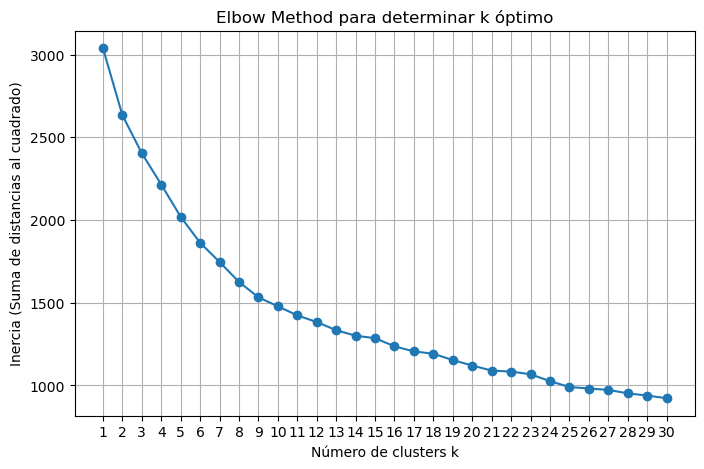

In [39]:
# Extraer solo las columnas estandarizadas (sin 'Country')
X_for_kmeans = df_features[num_cols_remaining].values

#  Calcular la inercia para k en [1, 30]
inertia_values = []
k_range = range(1, 31)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_for_kmeans)
    inertia_values.append(kmeans.inertia_)

# Graficar la curva de Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xticks(k_range)
plt.xlabel("Número de clusters k")
plt.ylabel("Inercia (Suma de distancias al cuadrado)")
plt.title("Elbow Method para determinar k óptimo")
plt.grid(True)
plt.show()

In [41]:
# Mostrar inercia en tabla para observación
inertia_df = pd.DataFrame({
    "k": list(k_range),
    "inercia": inertia_values
})
print("=== Inercia para cada k (1 a 30) ===")
display(inertia_df)

=== Inercia para cada k (1 a 30) ===


,k,inercia
0,1,3038.000000
1,2,2633.363302
2,3,2403.037818
3,4,2214.002453
4,5,2018.996963
5,6,1862.373041
6,7,1746.006845
7,8,1625.490301
8,9,1532.823695
9,10,1478.109517





---


Se aplicó el método del codo (*Elbow Method*) para identificar el número óptimo de clusters a partir del conjunto completo de atributos estandarizados. La curva resultante muestra la evolución de la **inercia** (suma de distancias al cuadrado dentro de los clusters) a medida que aumenta el número de clusters \( k \) en el rango de 1 a 30.

A partir del gráfico, se observa que la inercia disminuye de forma acelerada entre \( k = 1 \) y \( k = 3 \), lo cual indica que esos primeros clusters aportan la mayor ganancia en compactación del modelo. Sin embargo, a partir de \( k = 3 \), la pendiente de la curva se vuelve más suave, lo que sugiere rendimientos decrecientes en la reducción de la inercia. Por tanto, el punto de inflexión —o “codo” de la curva— se identifica en **\( k = 3 \)**, siendo este el número óptimo de clusters, ya que representa un equilibrio entre simplicidad del modelo y capacidad explicativa.



---


### Pregunta 2.8

Un problema habitual del modelo _K-Means_ es que pierde desempeño a mayor dimensionalidad.

En esta pregunta defina **por lo menos 5 combinaciones de columnas** (mínimo 2 columnas y máximo 4). Para cada combinación determine el número óptimo de clusters mediante el "Elbow method" considerando $k \in [1, 30]$.

Un posible enfoque para lo anterior es tomar un _approach_ estadístico y escoger variables que empíricamente muestran mayores indicios de poder diferenciador entre las observaciones. De todas formas, recuerde que la pregunta de interés es "¿qué países se verán expuestos de forma similar a la guerra comercial?". En este sentido, es altamente recomendable escoger variables con una mayor relación al fenómeno de la guerra comercial, ya que puede ser útil para discernir de qué forma podría verse expuesto cada grupo.


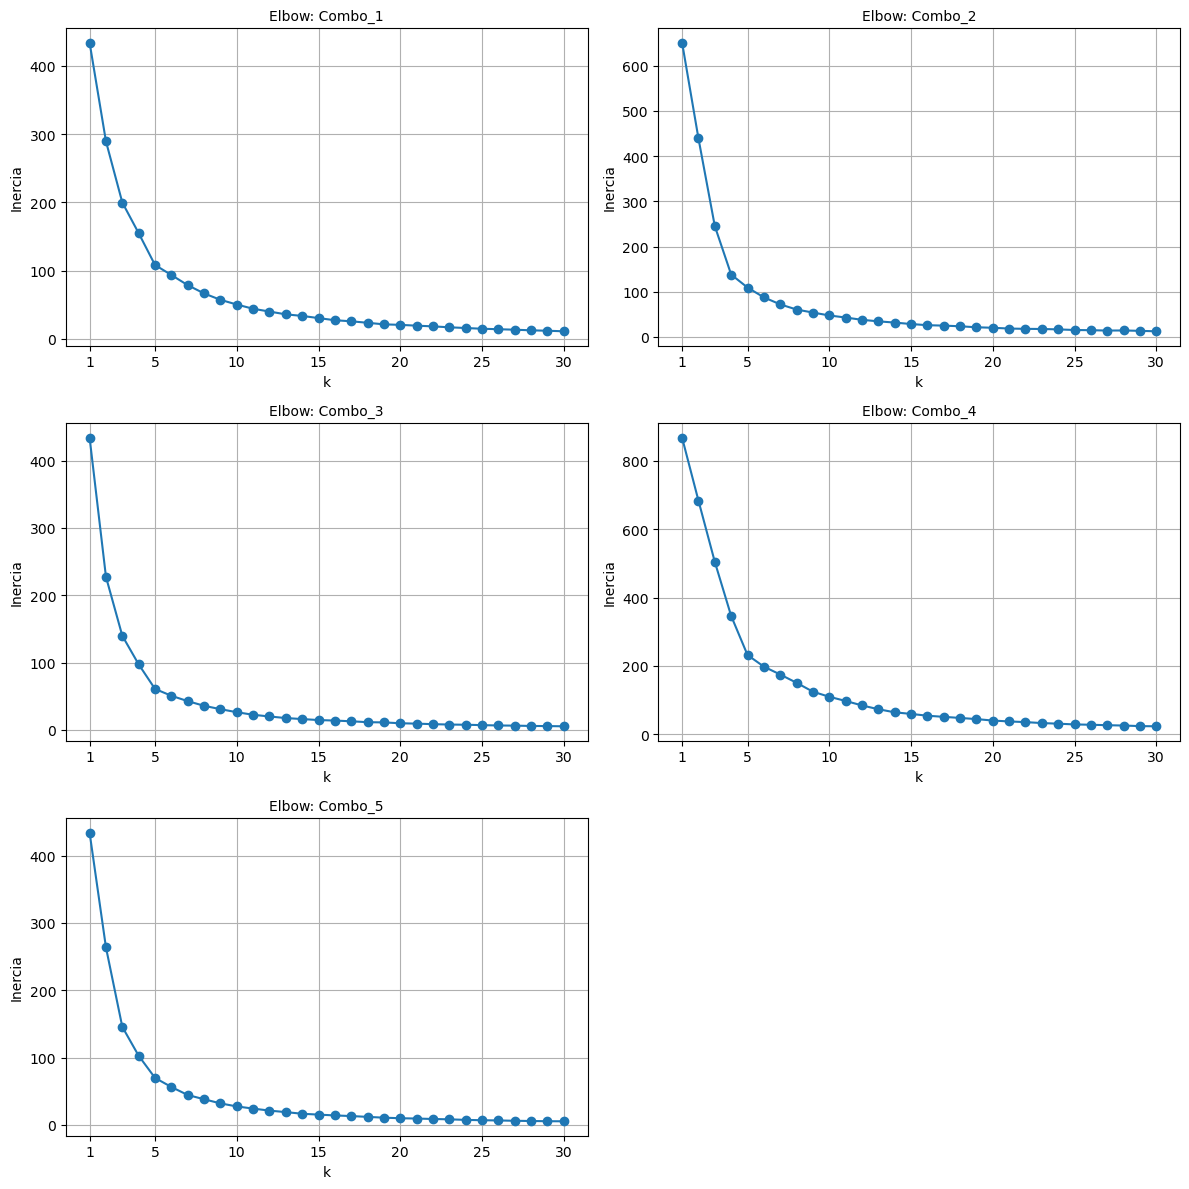

In [42]:
# Definimos al menos 5 combinaciones de columnas (entre 2 y 4 variables cada una)
combos = {
    "Combo_1": [
        "GDP_growth_annual_%", 
        "Exports_of_goods_and_services_%_of_GDP"
    ],
    "Combo_2": [
        "Manufactures_exports_%_of_merchandise_exports", 
        "Food_exports_%_of_merchandise_exports", 
        "Fuel_exports_%_of_merchandise_exports"
    ],
    "Combo_3": [
        "High-technology_exports_%_of_manufactured_exports", 
        "ICT_service_exports_%_of_service_exports;_BoP"
    ],
    "Combo_4": [
        "Merchandise_exports_to_high-income_economies_%_of_total_merchandise_exports",
        "Merchandise_exports_to_low-_and_middle-income_economies_in_Europe_&_Central_Asia_%_of_total_merchandise_exports",
        "Ores_and_metals_exports_%_of_merchandise_exports",
        "Agricultural_raw_materials_exports_%_of_merchandise_exports"
    ],
    "Combo_5": [
        "Insurance_and_financial_services_%_of_service_exports;_BoP",
        "Transport_services_%_of_commercial_service_exports"
    ]
}

# Preparar figura con 5 subplots (uno por combo)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

k_range = range(1, 31)
inertia_dict = {}  # para almacenar inercia de cada combo

for idx, (combo_name, cols) in enumerate(combos.items()):
    ax = axes[idx]
    
    #  Extraer columnas estandarizadas para este combo
    #       (en df_features ya están estandarizadas)
    X_sub = df_features[cols].copy()
    
    # Calcular inercia para cada k en [1,30]
    inertia_values = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_sub.values)
        inertia_values.append(kmeans.inertia_)
    
    # Guardar en diccionario para posible análisis posterior
    inertia_dict[combo_name] = inertia_values
    
    # Graficar Elbow para este combo
    ax.plot(k_range, inertia_values, marker='o', linestyle='-')
    ax.set_title(f"Elbow: {combo_name}", fontsize=10)
    ax.set_xlabel("k")
    ax.set_ylabel("Inercia")
    ax.set_xticks([1,5,10,15,20,25,30])
    ax.grid(True)

# Eliminar el subplot vacío (esquinas sobrantes)
for j in range(len(combos), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

In [43]:
for combo_name, inertia_values in inertia_dict.items():
    print(f"=== Inercia para {combo_name} ===")
    display(pd.DataFrame({
        "k": list(k_range),
        "inercia": inertia_values
    }))

=== Inercia para Combo_1 ===


,k,inercia
0,1,434.000000
1,2,289.545969
2,3,199.920653
3,4,155.030204
4,5,108.395161
5,6,93.691031
6,7,78.853254
7,8,66.714565
8,9,57.364004
9,10,50.448430


=== Inercia para Combo_2 ===


,k,inercia
0,1,651.000000
1,2,439.249944
2,3,245.155465
3,4,137.987816
4,5,109.222194
5,6,87.529238
6,7,71.990129
7,8,60.526719
8,9,53.876353
9,10,47.450081


=== Inercia para Combo_3 ===


,k,inercia
0,1,434.000000
1,2,227.450916
2,3,139.863266
3,4,97.495305
4,5,60.976934
5,6,50.793058
6,7,42.831570
7,8,35.928095
8,9,30.898819
9,10,26.395244


=== Inercia para Combo_4 ===


,k,inercia
0,1,868.000000
1,2,683.903430
2,3,504.597832
3,4,346.436377
4,5,232.010901
5,6,197.974338
6,7,174.888827
7,8,150.684419
8,9,124.598592
9,10,109.766750


=== Inercia para Combo_5 ===


,k,inercia
0,1,434.000000
1,2,263.632468
2,3,145.641424
3,4,102.741693
4,5,69.868560
5,6,56.317816
6,7,44.450774
7,8,38.131764
8,9,31.974885
9,10,27.468155


---

Con el objetivo de reducir la dimensionalidad y explorar la capacidad del modelo K-Means para diferenciar países en función de su sensibilidad a fenómenos tipo  como una pandemia o guerra comercial, se definieron cinco combinaciones distintas de variables numéricas (con entre 2 y 4 atributos cada una). Estas combinaciones fueron seleccionadas considerando su potencial explicativo desde una perspectiva económica: participación en exportaciones de manufacturas, servicios, combustibles y productos agrícolas, entre otros.

Para cada combinación, se aplicó el método del codo (*Elbow Method*), evaluando el comportamiento de la inercia para valores de \( k \in [1, 30] \). En todos los casos se observa una caída abrupta en la inercia en los primeros valores de \( k \), seguida por una estabilización progresiva. En la mayoría de las combinaciones se identifica un punto de inflexión en \( k = 3 \) o \( k = 4 \), lo cual sugiere que esos valores podrían representar el número adecuado de clusters para captar patrones relevantes sin sobreajustar el modelo. Este resultado refuerza la importancia de seleccionar variables pertinentes para evitar la pérdida de desempeño que puede surgir en espacios de alta dimensionalidad.


---

### Pregunta 2.9

Escoja la combinación de columnas que considera adecuada emplear, refiriéndose tanto al comportamiento observado de la curva, como al nivel de la métrica empleada al que se alcanza la convergencia.

Estime el modelo con $k$ óptimo y las columnas escogidas. Visualice los grupos graficando _scatterplots_. Considere gráficos en 3 dimensiones si su modelo posee 3 o más variables.

Describa en qué se diferencian los grupos encontrados y de qué manera le podría afectar la guerra comercial a cada uno. Liste una pequeña muestra representativa de los países que contiene cada grupo.


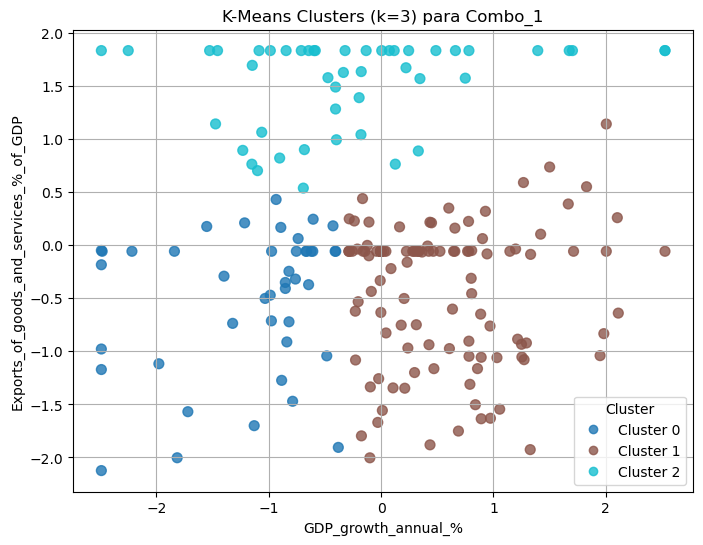

In [44]:
# Basado en los gráficos compartidos, seleccionamos Combo_1 (curva con codo claro en k≈3)
selected_combo = "Combo_1"
selected_cols = combos[selected_combo]

# Elegir k óptimo = 3 (observado en el “codo” para Combo_1)
k_opt = 3

# Entrenar KMeans final con k_opt y columnas seleccionadas
X_final = df_features[selected_cols].values
kmeans_final = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_final)

# Añadir la etiqueta de cluster al DataFrame
df_features["Cluster"] = clusters


# Como Combo_1 tiene 2 variables, usamos scatter 2D:
x_var, y_var = selected_cols[0], selected_cols[1]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_features[x_var], 
    df_features[y_var], 
    c=df_features["Cluster"], 
    cmap="tab10", 
    s=50,
    alpha=0.8
)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title(f"K-Means Clusters (k={k_opt}) para {selected_combo}")
plt.grid(True)
plt.legend(
    handles=scatter.legend_elements()[0], 
    labels=[f"Cluster {i}" for i in range(k_opt)],
    title="Cluster"
)
plt.show()

In [45]:
#  Agregar los valores originales (no estandarizados) para interpretar
df_result = df[[x_var, y_var]].copy()
df_result["Country"] = df_capped["Country"].values
df_result["Cluster"] = clusters

#  Mostrar pequeños ejemplos de países por cluster
print(f"--- Muestra de 5 países por cluster para {selected_combo}, k={k_opt} ---\n")
for cl in range(k_opt):
    sample_countries = df_result[df_result["Cluster"] == cl]["Country"].sample(5, random_state=42).tolist()
    print(f"Cluster {cl}: {sample_countries}\n")

--- Muestra de 5 países por cluster para Combo_1, k=3 ---

Cluster 0: ['Timor-Leste', 'Nepal', 'New Zealand', 'Sudan', 'South Africa']

Cluster 1: ['Comoros', 'Tanzania', 'Namibia', 'India', 'Gibraltar']

Cluster 2: ['Macao', 'Slovak Republic', 'Luxembourg', 'Thailand', 'Libya']



In [46]:
# Estadísticas descriptivas por cluster (en valores originales)
print(f"--- Estadísticas descriptivas (Original) por cluster para {selected_combo} ---\n")
display(df_result.groupby("Cluster")[[x_var, y_var]].agg(["mean", "std", "min", "max"]))

--- Estadísticas descriptivas (Original) por cluster para Combo_1 ---



GDP_growth_annual_%                                \
                       mean       std       min       max   
Cluster                                                     
0                 -0.186784  1.820914 -3.660000  1.952545   
1                  4.276543  1.710082  2.200061  9.690000   
2                  2.305229  2.813307 -3.660000  9.690000   

        Exports_of_goods_and_services_%_of_GDP                        \
                                          mean        std        min   
Cluster                                                                
0                                    31.048562  11.564698   3.190000   
1                                    33.051402  10.872150   5.263385   
2                                    66.122909   7.146561  49.045368   

                    
               max  
Cluster             
0        47.198478  
1        59.452086  
2        71.370000

---
Para esta pregunta se seleccionó la **Combinación 1**, compuesta por las variables `GDP_growth_annual_%` y `Exports_of_goods_and_services_%_of_GDP`, dado que mostró un comportamiento en el método del codo (k óptimo ≈ 3).

El modelo K-Means fue entrenado con \( k = 3 \) y se visualizaron los resultados mediante un *scatterplot*. Los grupos se distribuyen de manera estructurada:  
- **Cluster 0** agrupa principalmente países con bajo crecimiento económico y bajo nivel de exportaciones (como Timor-Leste, Nepal o Sudán), lo que sugiere una baja exposición a choques derivados de guerras comerciales.  
- **Cluster 1** representa países con crecimiento moderado y exportaciones medias, como India, Namibia y Tanzania. Estos países podrían enfrentar impactos parciales, especialmente si dependen de productos intermedios o de acceso a mercados específicos.  
- **Cluster 2** contiene países con altos niveles de exportaciones en relación al PIB y un rango más amplio de crecimiento económico, como Macao, Tailandia y Luxemburgo. Al tener una mayor apertura comercial, estos países serían los más expuestos a disrupciones en el comercio global.




---

## PCA

_PCA_ es una técnica de reducción de dimensionalidad que nos permite trabajar sobre un set de componentes principales ortogonales (mayor facilidad para los modelos a la hora de detectar patrones), además de permitirnos visualizar espacios multidimensionales, quedándonos sobre el espacio de PCA.



### Pregunta 2.10

Utilizando todas las variables originales y $k$ óptimo escogido en la pregunta anterior, estime un PCA con 2 componentes principales. Luego, estime un modelo _K-Means_ sobre los componentes principales obtenidos. Grafique las observaciones en un _scatterplot_ de 2 dimensiones. Coloree los puntos usando los label de los clusters obtenidos.

¿Cuáles son las principales diferencias entre los grupos? Encuentre las variables más definitivas a la hora de agrupar países con los 2 primeros componentes principales.


In [47]:
X_all = df[num_cols_remaining].copy()

# 2.2) Estandarizar con StandardScaler
scaler = StandardScaler()
X_all_scaled_array = scaler.fit_transform(X_all)
X_all_scaled = pd.DataFrame(X_all_scaled_array, columns=num_cols_remaining, index=df_capped.index)

#  Ajustar PCA(n_components=2) usando sklearn
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(X_all_scaled)

#  Construir DataFrame con scores PCA
df_pca = pd.DataFrame(
    principal_components,
    columns=["PC1", "PC2"],
    index=df.index
)
df_pca["Country"] = df["Country"].values

# Explicar varianza explicada
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por PC1: {explained_variance[0]:.3f}")
print(f"Varianza explicada por PC2: {explained_variance[1]:.3f}")
print(f"Varianza total (PC1+PC2): {explained_variance.sum():.3f}\n")

Varianza explicada por PC1: 0.208
Varianza explicada por PC2: 0.120
Varianza total (PC1+PC2): 0.328



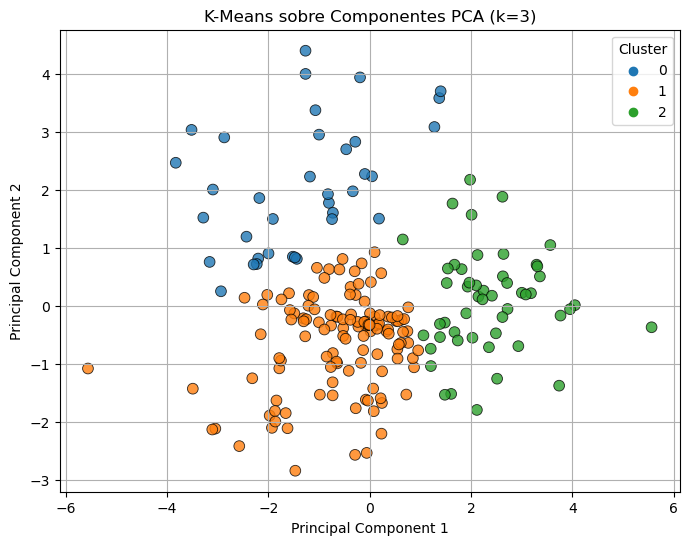

In [48]:
# Usar k óptimo = 3 (de Pregunta 2.9)
k_opt = 3
# Entrenar KMeans sobre los dos componentes PCA
kmeans_pca = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(df_pca[["PC1", "PC2"]])

df_pca["Cluster"] = clusters_pca

# Visualizar observaciones en scatterplot 2D coloreado por cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="Cluster",
    palette="tab10",
    data=df_pca,
    s=60,
    edgecolor="k",
    alpha=0.8
)
plt.title("K-Means sobre Componentes PCA (k=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [49]:
# Obtener loadings (componentes) para las dos PCs
loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1_loading", "PC2_loading"],
    index=num_cols_remaining
)

# Calcular la contribución absoluta y ordenar
loadings["abs_PC1"] = loadings["PC1_loading"].abs()
loadings["abs_PC2"] = loadings["PC2_loading"].abs()

# Top 5 variables para cada componente principal
top5_PC1 = loadings.sort_values(by="abs_PC1", ascending=False).head(5)
top5_PC2 = loadings.sort_values(by="abs_PC2", ascending=False).head(5)

print("\n--- Top 5 variables definitorias de PC1 ---")
display(top5_PC1[["PC1_loading", "abs_PC1"]])

print("\n--- Top 5 variables definitorias de PC2 ---")
display(top5_PC2[["PC2_loading", "abs_PC2"]])


--- Top 5 variables definitorias de PC1 ---


,PC1_loading,abs_PC1
Manufactures_exports_%_of_merchandise_exports,0.423060,0.423060
Computer;_communications_and_other_services_%_of_commercial_service_exports,0.400627,0.400627
High-technology_exports_%_of_manufactured_exports,0.396322,0.396322
ICT_service_exports_%_of_service_exports;_BoP,0.352017,0.352017
Merchandise_exports_to_high-income_economies_%_of_total_merchandise_exports,0.299777,0.299777



--- Top 5 variables definitorias de PC2 ---


,PC2_loading,abs_PC2
Fuel_exports_%_of_merchandise_exports,0.547435,0.547435
Transport_services_%_of_commercial_service_exports,0.459193,0.459193
Food_exports_%_of_merchandise_exports,-0.435453,0.435453
Insurance_and_financial_services_%_of_service_exports;_BoP,0.339312,0.339312
Ores_and_metals_exports_%_of_merchandise_exports,0.268859,0.268859


In [50]:
#  Agregar país y cluster al DataFrame de PCA
df_result = df_pca[["Country", "PC1", "PC2", "Cluster"]].copy()

# Mostrar ejemplos de países agrupados por cluster en el espacio PCA
print("\n--- Ejemplos de 5 países por cluster en espacio PCA ---\n")
for cl in range(k_opt):
    examples = df_result[df_result["Cluster"] == cl]["Country"].sample(5, random_state=42).tolist()
    print(f"Cluster {cl}: {examples}")


--- Ejemplos de 5 países por cluster en espacio PCA ---

Cluster 0: ['Zimbabwe', 'Guyana', 'Qatar', 'Timor-Leste', 'Mauritania']
Cluster 1: ['Indonesia', 'Faroe Islands', 'Cabo Verde', 'Curacao', 'Syrian Arab Republic']
Cluster 2: ['Spain', 'Singapore', 'Thailand', 'Denmark', 'Japan']


In [51]:
# Mostrar centroides de clusters en el espacio PCA
centroids = pd.DataFrame(
    kmeans_pca.cluster_centers_,
    columns=["PC1_centroid", "PC2_centroid"]
)
centroids["Cluster"] = centroids.index
print("\n--- Centroides en espacio PCA ---")
display(centroids)


--- Centroides en espacio PCA ---


,PC1_centroid,PC2_centroid,Cluster
0,-1.343669,2.079282,0
1,-0.553644,-0.604635,1
2,2.359721,0.073499,2


---


Se aplicó un análisis de componentes principales (PCA) sobre el conjunto completo de variables numéricas, y posteriormente se estimó un modelo K-Means con \( k = 3 \), valor previamente identificado como óptimo. Las dos primeras componentes explican conjuntamente un **32.8% de la varianza total** del dataset, con la primera (PC1) capturando el 20.8% y la segunda (PC2) el 12%. Si bien este nivel no abarca la mayoría de la variabilidad, es suficiente para obtener una visualización interpretativa de los grupos en un plano bidimensional.

Los resultados muestran tres grupos bien diferenciados. El **Cluster 0** se concentra en valores bajos de PC1 pero altos en PC2, lo que corresponde a países que destacan por sus exportaciones en sectores como combustible, transporte o servicios financieros (alta carga en PC2), pero con menor participación en manufacturas y servicios tecnológicos. Ejemplos de este grupo incluyen *Zimbabue, Guyana y Timor-Leste*. El **Cluster 1** presenta centroides negativos tanto en PC1 como en PC2, representando economías con bajo perfil exportador general, posiblemente más cerradas o menos integradas al comercio global (como *Indonesia, Cabo Verde y Curacao*). En contraste, el **Cluster 2** agrupa a países con alto valor en PC1 y valores medios en PC2, lo que indica un perfil exportador moderno, con predominancia de manufacturas, servicios de comunicaciones y tecnología. Países como *España, Singapur y Japón* pertenecen a este grupo, probablemente los más expuestos ante cambios derivados de conflictos comerciales internacionales.




---

### Pregunta 2.11


Repita lo anterior  (descripción incluida), pero con 3 componentes principales y un _scatterplot_ en 3 dimensiones.

In [52]:
# Ajustar PCA(n_components=3)
pca3 = PCA(n_components=3, random_state=42)
pcs_3 = pca3.fit_transform(X_all_scaled)

df_pca3 = pd.DataFrame(
    pcs_3, 
    columns=["PC1", "PC2", "PC3"],
    index=df.index
)
df_pca3["Country"] = df["Country"].values

# 3.2) Varianza explicada
explained_var3 = pca3.explained_variance_ratio_
print(f"Varianza explicada por PC1: {explained_var3[0]:.3f}")
print(f"Varianza explicada por PC2: {explained_var3[1]:.3f}")
print(f"Varianza explicada por PC3: {explained_var3[2]:.3f}")
print(f"Varianza total (PC1+PC2+PC3): {explained_var3.sum():.3f}\n")

Varianza explicada por PC1: 0.208
Varianza explicada por PC2: 0.120
Varianza explicada por PC3: 0.094
Varianza total (PC1+PC2+PC3): 0.421



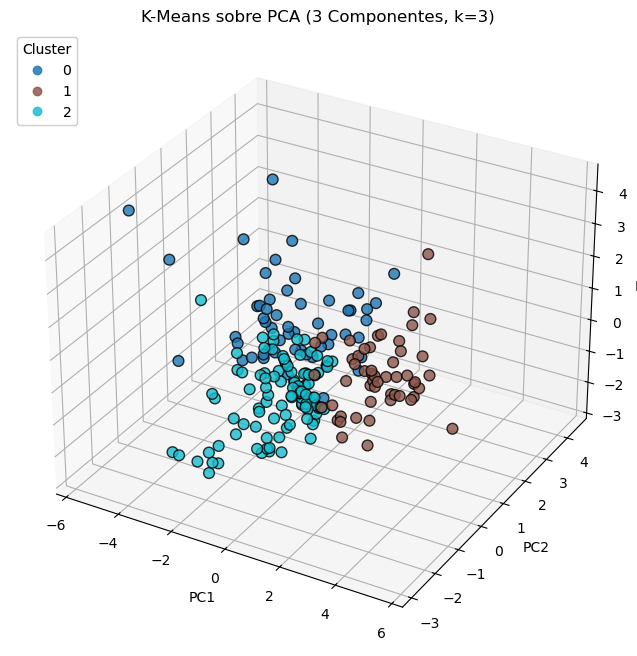

In [53]:
# K-Means sobre los 3 componentes principales
# Usar k óptimo = 3 (de Pregunta 2.9)
k_opt = 3

kmeans_pca3 = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
clusters_pca3 = kmeans_pca3.fit_predict(df_pca3[["PC1", "PC2", "PC3"]])

df_pca3["Cluster"] = clusters_pca3

# Visualización 3D scatterplot coloreado por cluster

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df_pca3["PC1"], 
    df_pca3["PC2"], 
    df_pca3["PC3"], 
    c=df_pca3["Cluster"], 
    cmap="tab10", 
    s=60, 
    alpha=0.8, 
    edgecolor='k'
)
ax.set_title("K-Means sobre PCA (3 Componentes, k=3)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
legend1 = ax.legend(
    *scatter.legend_elements(), 
    title="Cluster", 
    loc="upper left"
)
ax.add_artist(legend1)
plt.show()

In [54]:
# Interpretación: loadings y variables definitorias para las 3 PCs
# Obtener loadings para las tres PCs
loadings3 = pd.DataFrame(
    pca3.components_.T,
    columns=["PC1_loading", "PC2_loading", "PC3_loading"],
    index=num_cols_remaining
)
loadings3["abs_PC1"] = loadings3["PC1_loading"].abs()
loadings3["abs_PC2"] = loadings3["PC2_loading"].abs()
loadings3["abs_PC3"] = loadings3["PC3_loading"].abs()

# Top 5 variables definitorias para cada componente
top5_3PC1 = loadings3.sort_values(by="abs_PC1", ascending=False).head(5)
top5_3PC2 = loadings3.sort_values(by="abs_PC2", ascending=False).head(5)
top5_3PC3 = loadings3.sort_values(by="abs_PC3", ascending=False).head(5)

print("\n--- Top 5 variables definitorias de PC1 ---")
display(top5_3PC1[["PC1_loading", "abs_PC1"]])

print("\n--- Top 5 variables definitorias de PC2 ---")
display(top5_3PC2[["PC2_loading", "abs_PC2"]])

print("\n--- Top 5 variables definitorias de PC3 ---")
display(top5_3PC3[["PC3_loading", "abs_PC3"]])



--- Top 5 variables definitorias de PC1 ---


,PC1_loading,abs_PC1
Manufactures_exports_%_of_merchandise_exports,0.423060,0.423060
Computer;_communications_and_other_services_%_of_commercial_service_exports,0.400627,0.400627
High-technology_exports_%_of_manufactured_exports,0.396322,0.396322
ICT_service_exports_%_of_service_exports;_BoP,0.352017,0.352017
Merchandise_exports_to_high-income_economies_%_of_total_merchandise_exports,0.299777,0.299777



--- Top 5 variables definitorias de PC2 ---


,PC2_loading,abs_PC2
Fuel_exports_%_of_merchandise_exports,0.547435,0.547435
Transport_services_%_of_commercial_service_exports,0.459193,0.459193
Food_exports_%_of_merchandise_exports,-0.435453,0.435453
Insurance_and_financial_services_%_of_service_exports;_BoP,0.339312,0.339312
Ores_and_metals_exports_%_of_merchandise_exports,0.268859,0.268859



--- Top 5 variables definitorias de PC3 ---


,PC3_loading,abs_PC3
Merchandise_exports_to_low-_and_middle-income_economies_in_Europe_&_Central_Asia_%_of_total_merchandise_exports,0.494824,0.494824
ICT_service_exports_%_of_service_exports;_BoP,0.468465,0.468465
Agricultural_raw_materials_exports_%_of_merchandise_exports,0.360398,0.360398
Computer;_communications_and_other_services_%_of_commercial_service_exports,0.345218,0.345218
Merchandise_exports_to_high-income_economies_%_of_total_merchandise_exports,-0.337429,0.337429


In [55]:
# Ejemplos de países en cada cluster en espacio 3D
print("\n--- Ejemplos de 5 países por cluster en espacio PCA 3D ---\n")
for cl in range(k_opt):
    samples3 = df_pca3[df_pca3["Cluster"] == cl]["Country"].sample(5, random_state=42).tolist()
    print(f"Cluster {cl}: {samples3}")


--- Ejemplos de 5 países por cluster en espacio PCA 3D ---

Cluster 0: ['Iceland', 'United Arab Emirates', 'Turkmenistan', 'Egypt', 'Timor-Leste']
Cluster 1: ['Hong Kong', 'Serbia', 'Switzerland', 'Czechia', 'Slovak Republic']
Cluster 2: ['Palau', 'Belarus', 'Antigua and Barbuda', 'San Marino', 'Maldives']


In [56]:
# Centroides en espacio PCA 3
centroids3 = pd.DataFrame(
    kmeans_pca3.cluster_centers_,
    columns=["PC1_centroid", "PC2_centroid", "PC3_centroid"]
)
centroids3["Cluster"] = range(k_opt)
print("\n--- Centroides en espacio PCA 3D ---")
display(centroids3)


--- Centroides en espacio PCA 3D ---


,PC1_centroid,PC2_centroid,PC3_centroid,Cluster
0,-1.602739,1.182470,0.479598,0
1,2.343290,0.310917,0.274913,1
2,-0.318046,-0.720910,-0.362106,2


---

Para mejorar el análisis, se repitió el procedimiento anterior pero utilizando tres componentes principales (PC1, PC2 y PC3). Estos tres componentes explican conjuntamente el **42.1% de la varianza total** del conjunto de datos, lo cual representa una mejora considerable respecto al análisis bidimensional anterior. Se aplicó el modelo **K-Means con \( k = 3 \)** sobre el espacio de estos tres componentes, y los resultados fueron visualizados mediante un gráfico de dispersión tridimensional.

Los centroides revelan patrones de agrupación distintos:  
- **Cluster 0** se caracteriza por un valor negativo en PC1 pero positivo en PC2 y PC3. Esto sugiere que sus países integrantes tienen baja presencia en manufacturas/exportaciones tecnológicas (bajo PC1), pero alta participación en exportaciones tradicionales como combustibles y servicios de transporte (alto PC2) y exportaciones hacia regiones medias/bajas (alto PC3). Ejemplos representativos incluyen *Iceland, UAE y Egypt*.  
- **Cluster 1** presenta un fuerte valor positivo en PC1, lo que indica que está dominado por economías con alta proporción de exportaciones de alto valor agregado (manufacturas, servicios de tecnología y comunicación). También tiene valores positivos en PC2 y PC3, indicando un perfil equilibrado y moderno. Este grupo incluye a *Switzerland, Czechia y Hong Kong*.  
- **Cluster 2** se posiciona negativamente en PC2 y PC3, y tiene un valor moderado-negativo en PC1. Esto corresponde a países con baja exposición internacional, menor apertura comercial y perfiles más cerrados o dependientes de sectores primarios. Algunos ejemplos son *Palau, Belarus y Maldives*.

En cuanto a las variables más influyentes en cada componente, **PC1** sigue dominado por manufacturas y servicios de alto valor (e.g., `Manufactures_exports`, `High-tech_exports`), **PC2** representa commodities y servicios tradicionales (`Fuel_exports`, `Transport_services`), y **PC3** refleja orientación geográfica de exportaciones, especialmente hacia países de ingreso medio y bajo (`Merchandise_exports_to_low_and_middle_income`).



---

### Pregunta 2.12

Otro de los usos de los más comúnes de _PCA_, además de _feature engineering_, es la visualización. En esta sección utilizaremos _PCA_ para confirmar visualmente que estamos clusterizando países similares.

Usando el diccionario en la celda de abajo agrega una columna de continente al _dataframe_ de trabajo.

In [57]:
country_continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America', # Usually classified with the Caribbean
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Congo Dem. Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa', # Transcontinental, but usually Africa
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', # Transcontinental, mostly Asia
    'Kenya': 'Africa',
    'Korea Rep.': 'Asia',
    'Latvia': 'Europe',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia', # Transcontinental, mostly Asia
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa'
}
# Mapear continentes; si falta país, poner "Other"
df_pca["Continent"] = df_pca["Country"].map(country_continent_mapping).fillna("Other")
df["Continent"] = df["Country"].map(country_continent_mapping).fillna("Other")
df.head()

,Country,Agricultural_raw_materials_exports_%_of_merchandise_exports,Computer;_communications_and_other_services_%_of_commercial_service_exports,Exports_of_goods_and_services_%_of_GDP,Food_exports_%_of_merchandise_exports,Fuel_exports_%_of_merchandise_exports,GDP_growth_annual_%,High-technology_exports_%_of_manufactured_exports,ICT_service_exports_%_of_service_exports;_BoP,Insurance_and_financial_services_%_of_service_exports;_BoP,Manufactures_exports_%_of_merchandise_exports,Merchandise_exports_to_high-income_economies_%_of_total_merchandise_exports,Merchandise_exports_to_low-_and_middle-income_economies_in_Europe_&_Central_Asia_%_of_total_merchandise_exports,Ores_and_metals_exports_%_of_merchandise_exports,Transport_services_%_of_commercial_service_exports,Continent
0,Afghanistan,0.794963,32.273353,16.775136,15.056512,4.097826,2.710887,6.030929,7.285006,3.203366,37.251121,12.879827,9.682419,3.138350,15.739129,Other
1,Albania,0.406032,24.430109,38.665082,11.964078,6.345384,3.936625,0.682327,3.013976,0.662505,56.613966,77.708131,19.515973,5.349448,10.928753,Europe
2,Algeria,0.794963,59.162643,23.619536,15.056512,4.097826,4.100000,6.030929,2.213114,8.940000,37.251121,80.180030,6.367237,3.138350,25.470910,Other
3,American Samoa,0.794963,32.273353,38.790357,15.056512,4.097826,2.960181,6.030929,7.285006,3.203366,37.251121,73.155718,0.748545,3.138350,15.739129,Other
4,Andorra,0.415383,12.881184,38.790357,1.089864,0.010148,2.583555,19.070000,4.348926,3.728244,94.990393,65.682415,0.942470,1.774006,1.654643,Other


### Pregunta 2.13

Realice un PCA de 2 componentes principales, grafique un _scatterplot_ del resultado y coloree cada punto según su continente. ¿Que se obserba?


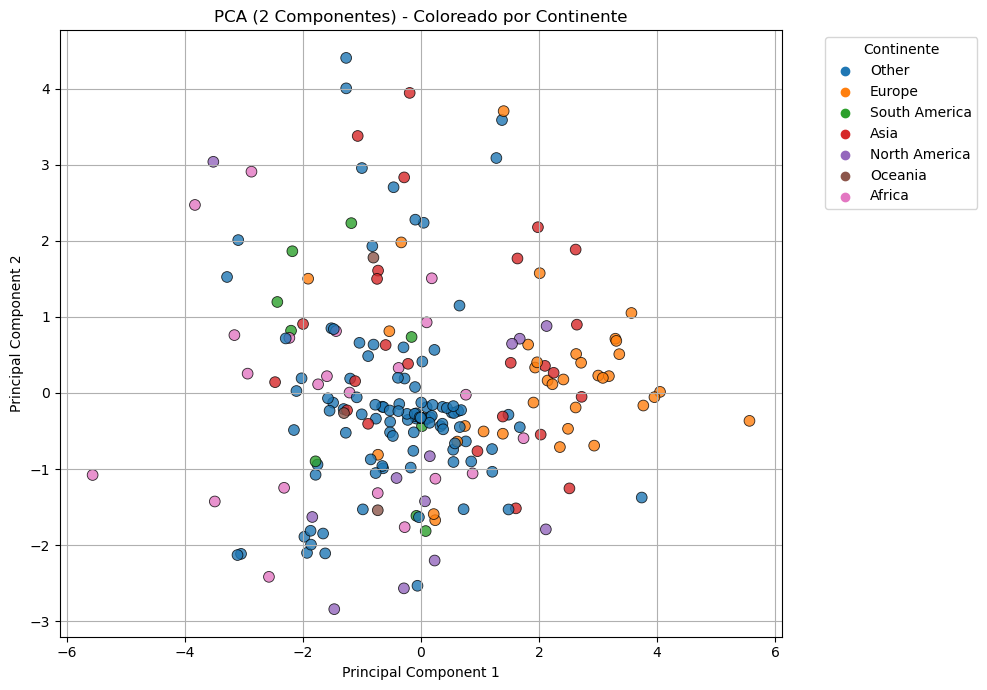

In [58]:
pca2 = PCA(n_components=2, random_state=42)
pcs_2 = pca2.fit_transform(X_all_scaled)

df_pca2 = pd.DataFrame(
    pcs_2, 
    columns=["PC1", "PC2"], 
    index=df.index
)
df_pca2["Country"] = df["Country"].values

# 3.1) K-Means sobre las 2 PCs (k=3)
k_opt = 3
kmeans_pca2 = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df_pca2["Cluster"] = kmeans_pca2.fit_predict(df_pca2[["PC1", "PC2"]])

df_pca2["Continent"] = df_pca2["Country"].map(country_continent_mapping).fillna("Other")
# Visualización PCA 2D coloreado por continente
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="Continent",
    palette="tab10",
    data=df_pca2,
    s=60,
    edgecolor="k",
    alpha=0.8
)
plt.title("PCA (2 Componentes) - Coloreado por Continente")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Continente", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

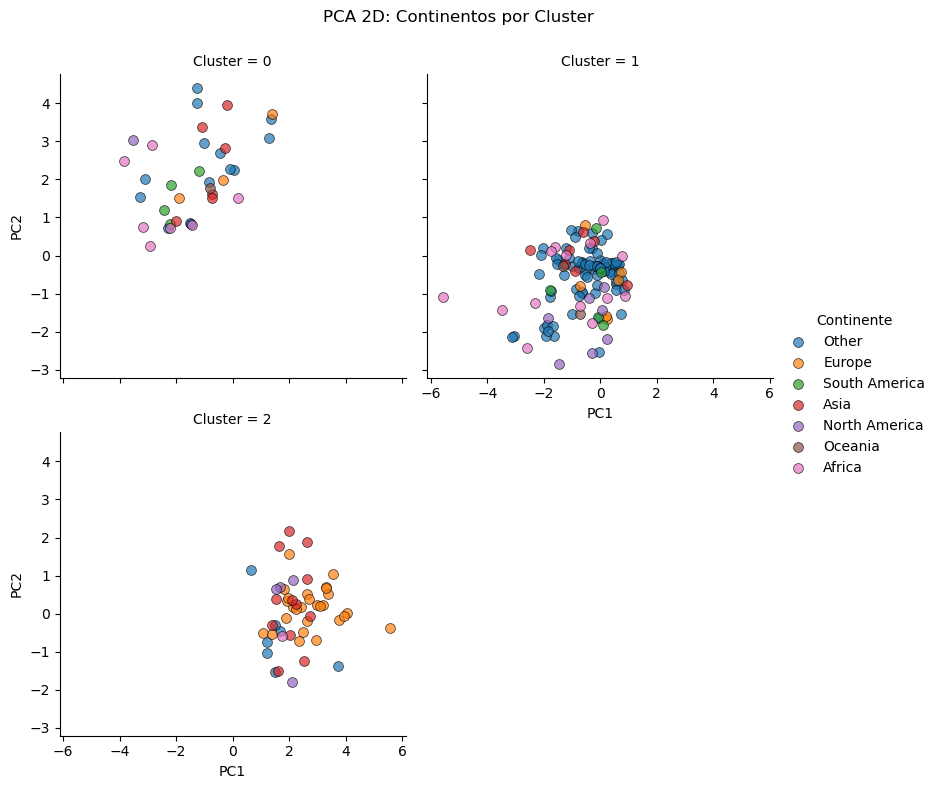

In [59]:
#Visualización PCA 2D con clusters y continente (mismo gráfico facetado)
g = sns.FacetGrid(df_pca2, hue="Continent", col="Cluster", col_wrap=2, height=4, palette="tab10")
g.map_dataframe(sns.scatterplot, x="PC1", y="PC2", s=50, edgecolor="k", alpha=0.7)
g.add_legend(title="Continente")
g.set_axis_labels("PC1", "PC2")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("PCA 2D: Continentos por Cluster")
plt.show()

---


En el gráfico generado, no se observa una separación estricta entre continentes, pero sí se aprecian ciertos patrones parciales:
- Los países de **Europa** tienden a concentrarse en la parte derecha del plano (valores positivos de PC1), lo que puede estar asociado a un perfil exportador más orientado a manufacturas y servicios tecnológicos, que dominan la carga de esta componente.
- **África** y algunos países de **Asia** se encuentran dispersos, pero con presencia relevante en cuadrantes con valores más bajos en PC1 y positivos en PC2, lo que concuerda con su mayor dependencia de exportaciones de commodities como combustibles y minerales.
- En contraste, **América del Norte**, **Sudamérica** y **Oceanía** presentan mayor dispersión, reflejando la heterogeneidad interna de esas regiones en cuanto a estructura exportadora.

En general, los resultados sugieren que el PCA logra capturar diferencias económicas relevantes que parcialmente coinciden con agrupamientos segun los continentes. No obstante, también se evidencia que la afiliación geográfica no siempre es suficiente para explicar patrones de especialización económica, reforzando la utilidad de aplicar técnicas como PCA y clustering para explorar estructuras más profundas.



---

### Pregunta 2.14

Genera el mismo gráfico anterior, pero ahora coloree los puntos del scatterplot usando los clusters de un KMeans de 3 clústers y `random_state=42`. Describa los clusters según el gráfico.



In [60]:
# Adjuntamos el diccionario
df_pca3["Continent"] = df_pca3["Country"].map(country_continent_mapping).fillna("Other")
# K-Means sobre los 3 componentes principales
k_opt = 3
kmeans_pca3 = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df_pca3["Cluster"] = kmeans_pca3.fit_predict(df_pca3[["PC1", "PC2", "PC3"]])

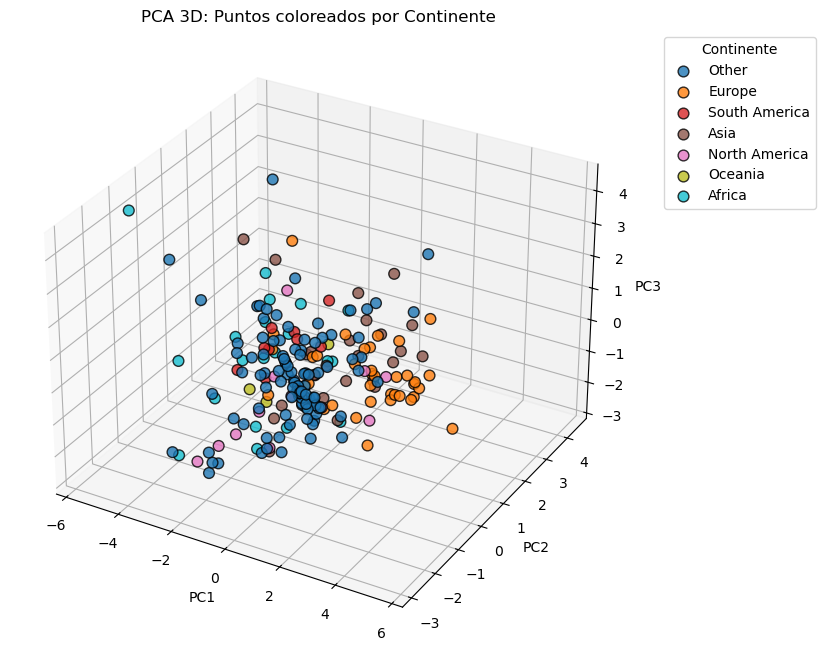

In [61]:
# Visualización 3D: scatterplot coloreado por continente
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
continents = df_pca3["Continent"].unique()
palette = plt.get_cmap("tab10", len(continents))
for i, cont in enumerate(continents):
    subset = df_pca3[df_pca3["Continent"] == cont]
    ax.scatter(
        subset["PC1"], 
        subset["PC2"], 
        subset["PC3"], 
        label=cont, 
        c=[palette(i)], 
        s=60, 
        alpha=0.8, 
        edgecolor='k'
    )
ax.set_title("PCA 3D: Puntos coloreados por Continente")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend(title="Continente", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

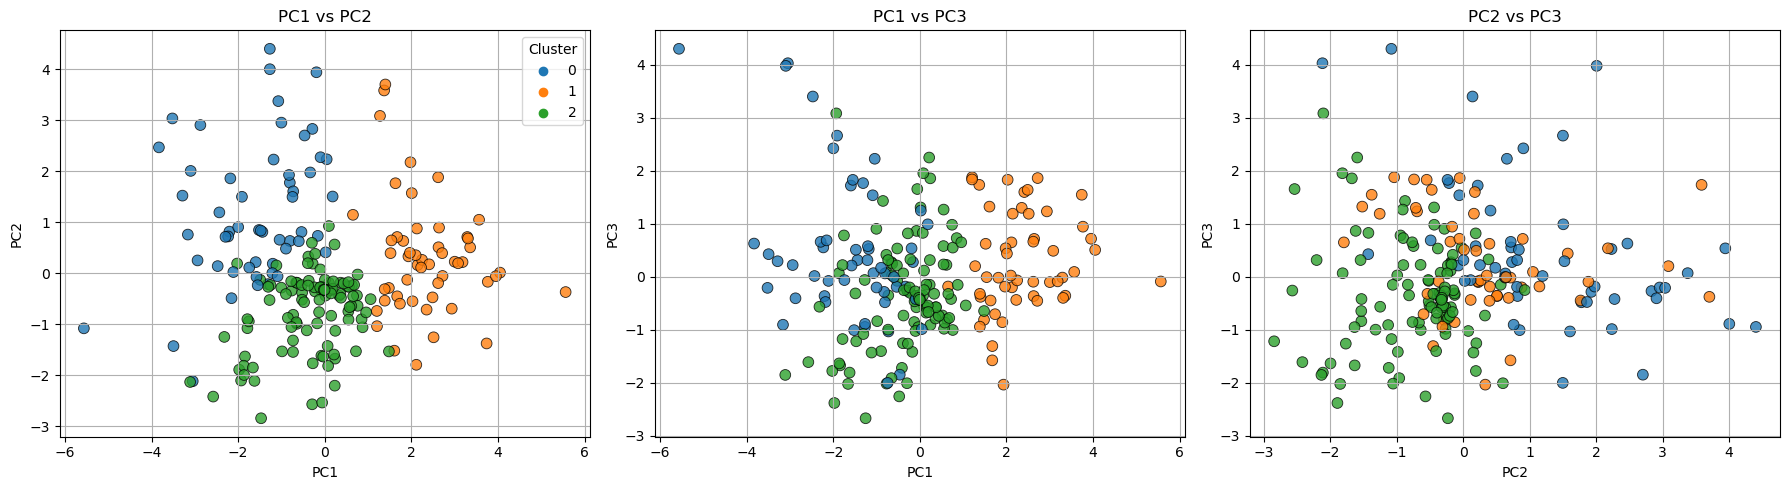

In [62]:
clusters = df_pca3["Cluster"].unique()
palette = sns.color_palette("tab10", len(clusters))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1) PC1 vs PC2
sns.scatterplot(
    x="PC1", y="PC2",
    hue="Cluster",
    palette=palette,
    data=df_pca3,
    s=60,
    ax=axes[0],
    edgecolor="k",
    alpha=0.8
)
axes[0].set_title("PC1 vs PC2")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].grid(True)
axes[0].legend(title="Cluster")

# 2) PC1 vs PC3
sns.scatterplot(
    x="PC1", y="PC3",
    hue="Cluster",
    palette=palette,
    data=df_pca3,
    s=60,
    ax=axes[1],
    edgecolor="k",
    alpha=0.8
)
axes[1].set_title("PC1 vs PC3")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC3")
axes[1].grid(True)
axes[1].legend_.remove()  # Quitamos leyenda repetida

# 3) PC2 vs PC3
sns.scatterplot(
    x="PC2", y="PC3",
    hue="Cluster",
    palette=palette,
    data=df_pca3,
    s=60,
    ax=axes[2],
    edgecolor="k",
    alpha=0.8
)
axes[2].set_title("PC2 vs PC3")
axes[2].set_xlabel("PC2")
axes[2].set_ylabel("PC3")
axes[2].grid(True)
axes[2].legend_.remove()  # Quitamos leyenda repetida

plt.tight_layout()
plt.show()

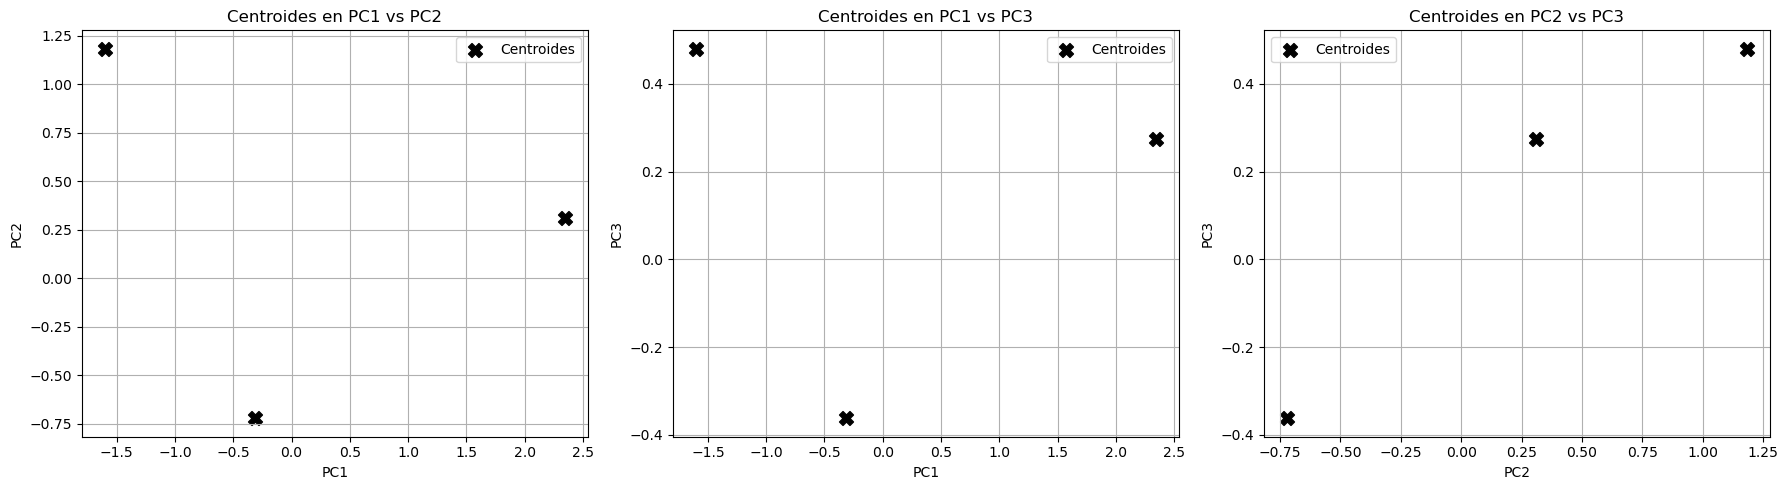

In [63]:
# Obtener centroides en espacio PCA 3D:
centroids = kmeans_pca3.cluster_centers_

# Proyectar centroides en cada combinación 2D
cent_PC1_PC2 = centroids[:, [0, 1]]
cent_PC1_PC3 = centroids[:, [0, 2]]
cent_PC2_PC3 = centroids[:, [1, 2]]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Centroides PC1 vs PC2
axes[0].scatter(
    cent_PC1_PC2[:, 0], 
    cent_PC1_PC2[:, 1], 
    c="black", 
    marker="X", 
    s=100, 
    label="Centroides"
)
axes[0].set_title("Centroides en PC1 vs PC2")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].grid(True)
axes[0].legend()

# Centroides PC1 vs PC3
axes[1].scatter(
    cent_PC1_PC3[:, 0], 
    cent_PC1_PC3[:, 1], 
    c="black", 
    marker="X", 
    s=100, 
    label="Centroides"
)
axes[1].set_title("Centroides en PC1 vs PC3")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC3")
axes[1].grid(True)
axes[1].legend()

# Centroides PC2 vs PC3
axes[2].scatter(
    cent_PC2_PC3[:, 0], 
    cent_PC2_PC3[:, 1], 
    c="black", 
    marker="X", 
    s=100, 
    label="Centroides"
)
axes[2].set_title("Centroides en PC2 vs PC3")
axes[2].set_xlabel("PC2")
axes[2].set_ylabel("PC3")
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()

---


La grafica revela una clara diferenciación entre los tres grupos:
- **Cluster 0** se ubica principalmente en la zona con valores bajos en PC1 pero altos en PC2 y PC3. Esto sugiere un perfil centrado en exportaciones tradicionales o hacia regiones específicas, como África o Medio Oriente.
- **Cluster 1** presenta valores positivos en PC1, lo que indica fuerte presencia de exportaciones modernas (manufacturas y tecnología), y valores ligeramente positivos en PC2 y PC3. Este grupo podría asociarse con economías desarrolladas o industrializadas.
- **Cluster 2** se agrupa en la región con valores negativos en PC2 y PC3, y valores más moderados o negativos en PC1. Esto sugiere países con menor grado de apertura comercial o mayor dependencia de sectores básicos y poco diversificados.

Los gráficos adicionales con proyecciones parciales (PC1 vs PC2, PC1 vs PC3, PC2 vs PC3) y los centroides proyectados ayudan a confirmar la distancia relativa entre grupos. La distribución espacial de los clusters también valida que el modelo logra capturar patrones relevantes sin una clara conotacion por continente. 



---

### Pregunta 2.15

¿Cual es la proporcion de cada cluster por continente?


In [64]:
# PCA2: Proporción de cada cluster por continente

# Tabla de frecuencias absolutas: conteos por Continent y Cluster
freq2 = df_pca2.groupby(["Continent", "Cluster"]).size().unstack(fill_value=0)

# Totales por continente (suma de clusters)
totales2 = freq2.sum(axis=1)

# Calcular proporciones (frecuencia / total por continente)
prop2 = freq2.div(totales2, axis=0)

print("=== Frecuencias absolutas por continente y cluster (PCA2) ===")
display(freq2)

print("\n=== Proporciones por continente (PCA2) ===")
display(prop2)

=== Frecuencias absolutas por continente y cluster (PCA2) ===


Cluster,0,1,2
Continent,,,
Africa,7,14,1
Asia,6,7,12
Europe,3,6,27
North America,1,7,4
Oceania,1,2,0
Other,14,89,7
South America,4,5,0



=== Proporciones por continente (PCA2) ===


Cluster,0,1,2
Continent,,,
Africa,0.318182,0.636364,0.045455
Asia,0.240000,0.280000,0.480000
Europe,0.083333,0.166667,0.750000
North America,0.083333,0.583333,0.333333
Oceania,0.333333,0.666667,0.000000
Other,0.127273,0.809091,0.063636
South America,0.444444,0.555556,0.000000


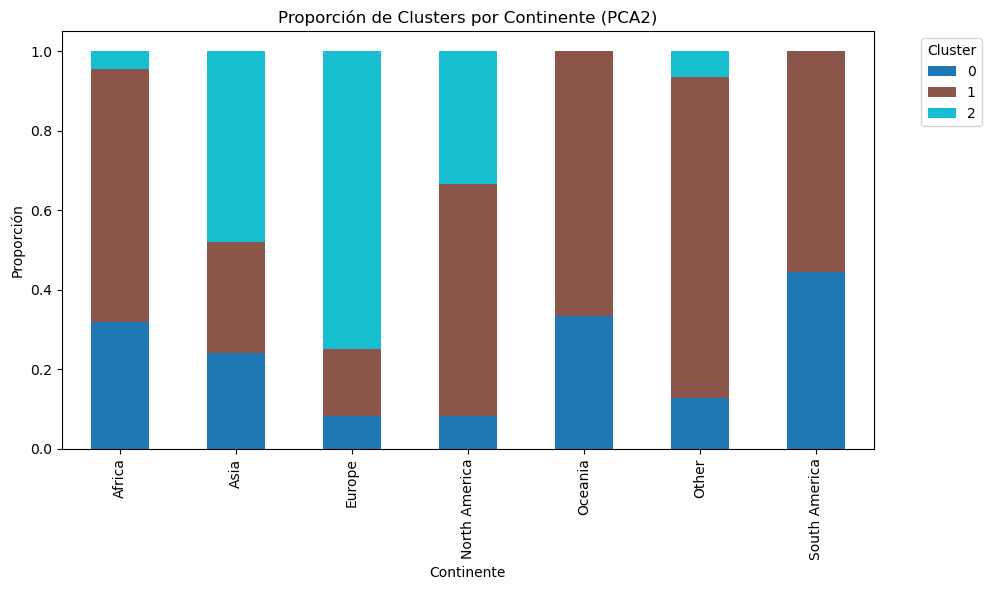

In [65]:
# Gráfico de barras apiladas mostrando proporciones PCA2
prop2.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    cmap="tab10"
)
plt.title("Proporción de Clusters por Continente (PCA2)")
plt.xlabel("Continente")
plt.ylabel("Proporción")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [66]:
#  PCA3: Proporción de cada cluster por continente
# Tabla de frecuencias absolutas: conteos por Continent y Cluster
freq3 = df_pca3.groupby(["Continent", "Cluster"]).size().unstack(fill_value=0)
# Totales por continente
totales3 = freq3.sum(axis=1)

#  Calcular proporciones
prop3 = freq3.div(totales3, axis=0)

print("\n=== Frecuencias absolutas por continente y cluster (PCA3) ===")
display(freq3)

print("\n=== Proporciones por continente (PCA3) ===")
display(prop3)


=== Frecuencias absolutas por continente y cluster (PCA3) ===


Cluster,0,1,2
Continent,,,
Africa,12,1,9
Asia,8,12,5
Europe,3,27,6
North America,1,4,7
Oceania,1,0,2
Other,24,8,78
South America,5,0,4



=== Proporciones por continente (PCA3) ===


Cluster,0,1,2
Continent,,,
Africa,0.545455,0.045455,0.409091
Asia,0.320000,0.480000,0.200000
Europe,0.083333,0.750000,0.166667
North America,0.083333,0.333333,0.583333
Oceania,0.333333,0.000000,0.666667
Other,0.218182,0.072727,0.709091
South America,0.555556,0.000000,0.444444


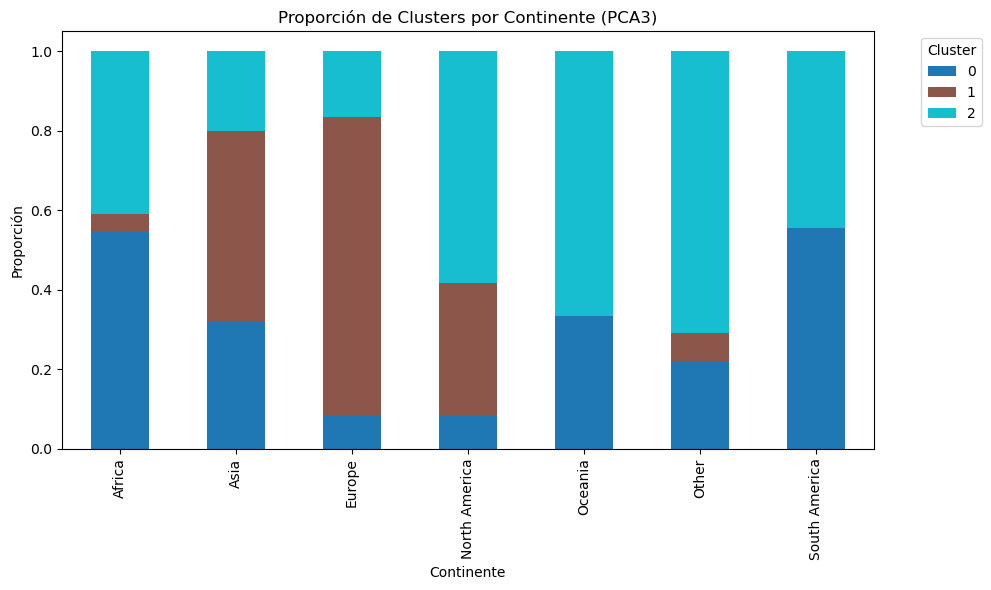

In [67]:
# Gráfico de barras apiladas mostrando proporciones PCA3
prop3.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    cmap="tab10"
)
plt.title("Proporción de Clusters por Continente (PCA3)")
plt.xlabel("Continente")
plt.ylabel("Proporción")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

---

Se calculó la proporción de pertenencia a cada cluster por continente, utilizando los resultados de KMeans en dos espacios diferentes: PCA con 2 componentes (PCA2) y PCA con 3 componentes (PCA3). 

#### Resultados en PCA2

En el espacio bidimensional:
- **Europa** muestra una fuerte concentración en el Cluster 2 (75%), asociado previamente a exportaciones manufactureras y servicios tecnológicos.
- **África** y **Asia** presentan una mayor heterogeneidad, pero destacan por su presencia en el Cluster 1 (63% y 28% respectivamente), que representa un perfil mixto de desarrollo exportador.
- **South America** está distribuido entre los Clusters 0 y 1, lo cual puede reflejar diferencias estructurales entre países más primario-exportadores y otros más diversificados.

#### Resultados en PCA3

Con tres componentes, la segmentación cambia sutilmente:
- **Europa** mantiene su fuerte concentración en Cluster 1 (75%), reafirmando su perfil exportador.
- **África** ahora se reparte principalmente entre los Clusters 0 y 2 (54% y 41% respectivamente), lo cual podría reflejar mayor diversidad económica interna.
- **South America** tiene una presencia más notable en el Cluster 0 (55%), y ninguna en el Cluster 2, indicando que la tercera componente puede estar capturando factores diferenciadores clave para esta región.
- **Other** (que incluye países pequeños o sin clasificación clara) tiende a concentrarse en el Cluster 2, tanto en PCA2 como PCA3, lo cual refuerza su perfil singular dentro del espacio económico global.

#### Conclusión

En general, la segmentación por clusters presenta patrones continentales reconocibles, especialmente en regiones como Europa o África. Sin embargo, también se observa que la pertenencia a un cluster no depende exclusivamente de la ubicación geográfica, sino del perfil económico-comercial capturado por los componentes principales.



---


### Pregunta 2.16

¿Cuál es la característica numérica más alta en magnitud por cluster (usando sus centroides)? ¿Cuál es su signo? ¿Como nos ayuda a interpretar los clusters? ¿Que podemos concluir de cada uno de estos clusters en contexto de la guerra comercial?


In [68]:
# Extraer centroides de kmeans_pca2 (2 dimensiones)
centroids2 = pd.DataFrame(
    kmeans_pca2.cluster_centers_,
    columns=["PC1_centroid", "PC2_centroid"]
)
centroids2["Cluster"] = centroids2.index

# Función para comparar |PC1| vs |PC2|
def caracteristica_max_pc2(row):
    if abs(row["PC1_centroid"]) >= abs(row["PC2_centroid"]):
        return ("PC1", row["PC1_centroid"])
    else:
        return ("PC2", row["PC2_centroid"])

#  Aplicar y descomponer en dos columnas nuevas
centroids2["Mayor_PC"], centroids2["Valor_PC"] = zip(
    *centroids2.apply(caracteristica_max_pc2, axis=1)
)

print("=== Centroides PCA2 y característica de mayor magnitud por cluster ===")
display(centroids2[["Cluster", "PC1_centroid", "PC2_centroid", "Mayor_PC", "Valor_PC"]])

# Cluster en PCA2
loadings2 = pd.DataFrame(
    pca2.components_.T,
    columns=["PC1_loading", "PC2_loading"],
    index=num_cols_remaining
)
#  Añadir columnas con valor absoluto de cada loading
loadings2["abs_PC1"] = loadings2["PC1_loading"].abs()
loadings2["abs_PC2"] = loadings2["PC2_loading"].abs()

# Identificar variable más definitoria por cluster en PCA2
results2 = []

for _, row in centroids2.iterrows():
    cluster = row["Cluster"]
    mayor_pc = row["Mayor_PC"]    # "PC1" o "PC2"
    valor_pc = row["Valor_PC"]    # valor (con signo) de esa componente

    if mayor_pc == "PC1":
        # Buscar la variable con mayor abs_PC1
        var_mayor = loadings2["abs_PC1"].idxmax()
        loading_val = loadings2.loc[var_mayor, "PC1_loading"]
    else:
        # mayor_pc == "PC2"
        var_mayor = loadings2["abs_PC2"].idxmax()
        loading_val = loadings2.loc[var_mayor, "PC2_loading"]

    results2.append({
        "Cluster": cluster,
        "Mayor_PC": mayor_pc,
        "Valor_PC": valor_pc,
        "Variable_Definitoria": var_mayor,
        "Loading_en_PC": loading_val
    })

df_results2 = pd.DataFrame(results2)
print("=== Característica numérica más alta en magnitud por cluster (PCA2) ===")
display(df_results2)


=== Centroides PCA2 y característica de mayor magnitud por cluster ===


,Cluster,PC1_centroid,PC2_centroid,Mayor_PC,Valor_PC
0,0,-1.343669,2.079282,PC2,2.079282
1,1,-0.553644,-0.604635,PC2,-0.604635
2,2,2.359721,0.073499,PC1,2.359721


=== Característica numérica más alta en magnitud por cluster (PCA2) ===


,Cluster,Mayor_PC,Valor_PC,Variable_Definitoria,Loading_en_PC
0,0,PC2,2.079282,Fuel_exports_%_of_merchandise_exports,0.547435
1,1,PC2,-0.604635,Fuel_exports_%_of_merchandise_exports,0.547435
2,2,PC1,2.359721,Manufactures_exports_%_of_merchandise_exports,0.423060


In [69]:
# Extraer centroides de kmeans_pca3 (3 dimensiones)
centroids3 = pd.DataFrame(
    kmeans_pca3.cluster_centers_,
    columns=["PC1_centroid", "PC2_centroid", "PC3_centroid"]
)
centroids3["Cluster"] = centroids3.index

# Función para comparar |PC1|, |PC2|, |PC3|
def caracteristica_max_pc3(row):
    mags = {
        "PC1": abs(row["PC1_centroid"]),
        "PC2": abs(row["PC2_centroid"]),
        "PC3": abs(row["PC3_centroid"])
    }
    mayor = max(mags, key=mags.get)
    return mayor, row[f"{mayor}_centroid"]

#  Aplicar y descomponer en dos columnas nuevas
centroids3["Mayor_PC"], centroids3["Valor_PC"] = zip(
    *centroids3.apply(caracteristica_max_pc3, axis=1)
)

print("\n=== Centroides PCA3 y característica de mayor magnitud por cluster ===")
display(centroids3[[
    "Cluster",
    "PC1_centroid", "PC2_centroid", "PC3_centroid",
    "Mayor_PC", "Valor_PC"
]])


# Cluster en PCA3
# Construir DataFrame de loadings para las 3 PCs
loadings3 = pd.DataFrame(
    pca3.components_.T,
    columns=["PC1_loading", "PC2_loading", "PC3_loading"],
    index=num_cols_remaining
)
#  Añadir columnas con valor absoluto de cada loading
loadings3["abs_PC1"] = loadings3["PC1_loading"].abs()
loadings3["abs_PC2"] = loadings3["PC2_loading"].abs()
loadings3["abs_PC3"] = loadings3["PC3_loading"].abs()
# Identificar variable más definitoria por cluster en PCA3

results3 = []

for _, row in centroids3.iterrows():
    cluster = row["Cluster"]
    mayor_pc = row["Mayor_PC"]    # "PC1", "PC2" o "PC3"
    valor_pc = row["Valor_PC"]

    # La columna de abs a usar será “abs_PC1”, “abs_PC2” o “abs_PC3”
    col_abs = f"abs_{mayor_pc}"
    col_loading = f"{mayor_pc}_loading"

    # Buscar la variable con mayor carga absoluta en esa componente
    var_mayor = loadings3[col_abs].idxmax()
    loading_val = loadings3.loc[var_mayor, col_loading]

    results3.append({
        "Cluster": cluster,
        "Mayor_PC": mayor_pc,
        "Valor_PC": valor_pc,
        "Variable_Definitoria": var_mayor,
        "Loading_en_PC": loading_val
    })

df_results3 = pd.DataFrame(results3)
print("\n=== Característica numérica más alta en magnitud por cluster (PCA3) ===")
display(df_results3)


=== Centroides PCA3 y característica de mayor magnitud por cluster ===


,Cluster,PC1_centroid,PC2_centroid,PC3_centroid,Mayor_PC,Valor_PC
0,0,-1.602739,1.182470,0.479598,PC1,-1.602739
1,1,2.343290,0.310917,0.274913,PC1,2.343290
2,2,-0.318046,-0.720910,-0.362106,PC2,-0.720910



=== Característica numérica más alta en magnitud por cluster (PCA3) ===


,Cluster,Mayor_PC,Valor_PC,Variable_Definitoria,Loading_en_PC
0,0,PC1,-1.602739,Manufactures_exports_%_of_merchandise_exports,0.423060
1,1,PC1,2.343290,Manufactures_exports_%_of_merchandise_exports,0.423060
2,2,PC2,-0.720910,Fuel_exports_%_of_merchandise_exports,0.547435


---


Con base en los centroides del modelo KMeans entrenado en los espacios PCA2 y PCA3, se identificó cuál es la **componente principal de mayor magnitud (en valor absoluto)** por cluster, y luego se vinculó dicha componente con la **variable numérica original que tiene mayor carga (loading)** en esa dimensión.

#### Resultados en PCA2
- **Cluster 0** presenta su mayor magnitud en **PC2 (valor positivo: 2.08)**. La variable dominante en PC2 es `Fuel_exports_%_of_merchandise_exports`, lo que sugiere que este grupo está compuesto por países con alta dependencia de exportaciones de combustibles.
- **Cluster 1** también se asocia a **PC2**, pero con signo **negativo (-0.60)**. Esto indica que los países en este cluster tienen baja participación en exportaciones de combustibles, lo cual puede representar estructuras más diversificadas o dependientes de otros sectores.
- **Cluster 2** se distingue por un valor muy alto en **PC1 (2.36)**, siendo `Manufactures_exports_%_of_merchandise_exports` la variable más influyente. Por tanto, este cluster representa países con alta orientación a exportaciones manufactureras.

#### Resultados en PCA3
- **Cluster 0** mantiene como componente dominante **PC1 (-1.60)**, lo que nuevamente sugiere un bajo nivel en exportaciones manufactureras.
- **Cluster 1** tiene un valor muy alto en **PC1 (2.34)**, lo que refuerza su perfil como cluster industrializado, con fuerte participación en manufacturas.
- **Cluster 2** destaca ahora por un valor negativo en **PC2 (-0.72)**, asociado con bajos niveles en exportaciones de combustibles.

#### Interpretación

Estos hallazgos permiten interpretar los clusters con base en su orientación comercial:
- **Cluster 0**: Países con bajo nivel de manufacturas, pero en PCA2 muestran un perfil alto en combustibles. Esto podría incluir economías emergentes o con estructuras de exportación tradicionales.
- **Cluster 1**: Representa a países con alto desarrollo manufacturero, lo que puede asociarse a mayor exposición en conflictos comerciales que afecten cadenas de valor globales.
- **Cluster 2**: Aparece como un grupo con menor participación en combustibles (PCA3), y en PCA2 como intermedio o residual. Puede incluir países más cerrados o con perfiles de exportación menos concentrados.

En el contexto de una guerra comercial, **Cluster 1** es el más vulnerable por su alta integración a los mercados globales de manufacturas, mientras que **Cluster 0** podría ser afectado en mercados energéticos. **Cluster 2**, por su perfil más heterogéneo o menos expuesto, podría verse menos afectado en términos directos.



---